In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [3]:
df = pd.read_csv("D:/Msc Data Sciences (Birbeck UOL)/DSTA/Coursework/UCI_Credit_Card.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# We have categorical columns namely, SEX MARRIAGE and EDUCATION. Lets explore these columns 
df[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


WE HAVE UNLABBELED CATEGOORIES IN EDUCATION COLUMNS WHICH ARE 5 AND 6 AND 0 IS UNDOCUMNETED 

LETS EXPLORE PAYMENT STATUS COLUMNS 

In [5]:
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


-2 in ALL the columns is undocumneted 
We will consider 0 as 'duly paid' and 0,1,2 will be the number of months of delay in payment. 
This will be done later 
Let's Explore Bill description

In [7]:
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,891586.000000,927171.000000,961664.000000


-ve payments could be considered as credits will be explore further.

In [8]:
# Now exploring previous paymnets. 
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Lets clean the data now. Starting with renaming the columns. 
Here we are renaming target columns as def_status and PAY_0 as PAY_1 to maintain the symmetry in the columns

In [9]:
df.rename(columns={"default.payment.next.month": "def_status",
                    'PAY_0': 'PAY_1'}, inplace=True)

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
# For EDUCATION 4 is others, but 0,5,6 are undocumented therefore they will be replaced my 4. 
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

In [12]:
df['EDUCATION'].describe()

count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

In [13]:
# replacing 0 to 3, here 3 is others while 0 is undocumented 
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [14]:
df['MARRIAGE'].describe()

count    30000.000000
mean         1.557267
std          0.521405
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [15]:
def replace_zero(column):
    value_to_replace = [-2,-1,0] 
    value = df[column].isin(value_to_replace)
    df.loc[value,column] = 0
for i in ['PAY_1','PAY_2','PAY_3','PAY_3','PAY_4','PAY_5','PAY_5','PAY_6']:
    replace_zero(i)

The percentage of defaulters in the data is 22.12 %


[]

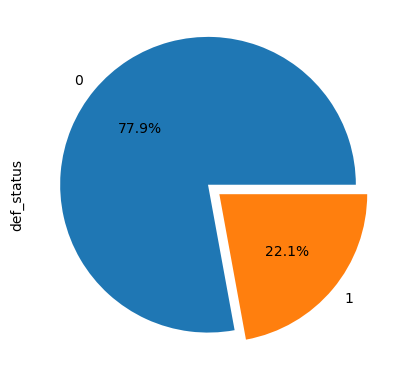

In [16]:
# Now lets do eploratory analysis of the data 
# number of defaulters. 
# How many defaulters
perc_default = df.def_status.sum() / len(df.def_status)
print(f'The percentage of defaulters in the data is {perc_default*100} %')
df['def_status'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()

In [17]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
    for i, var_name in enumerate(variables):
        row = i // n_cols
        col = i % n_cols
        sns.histplot(data=df, x=var_name, bins=n_bins, ax=axes[row, col])
        axes[row, col].set_title(var_name)
    fig.tight_layout()
    plt.show()

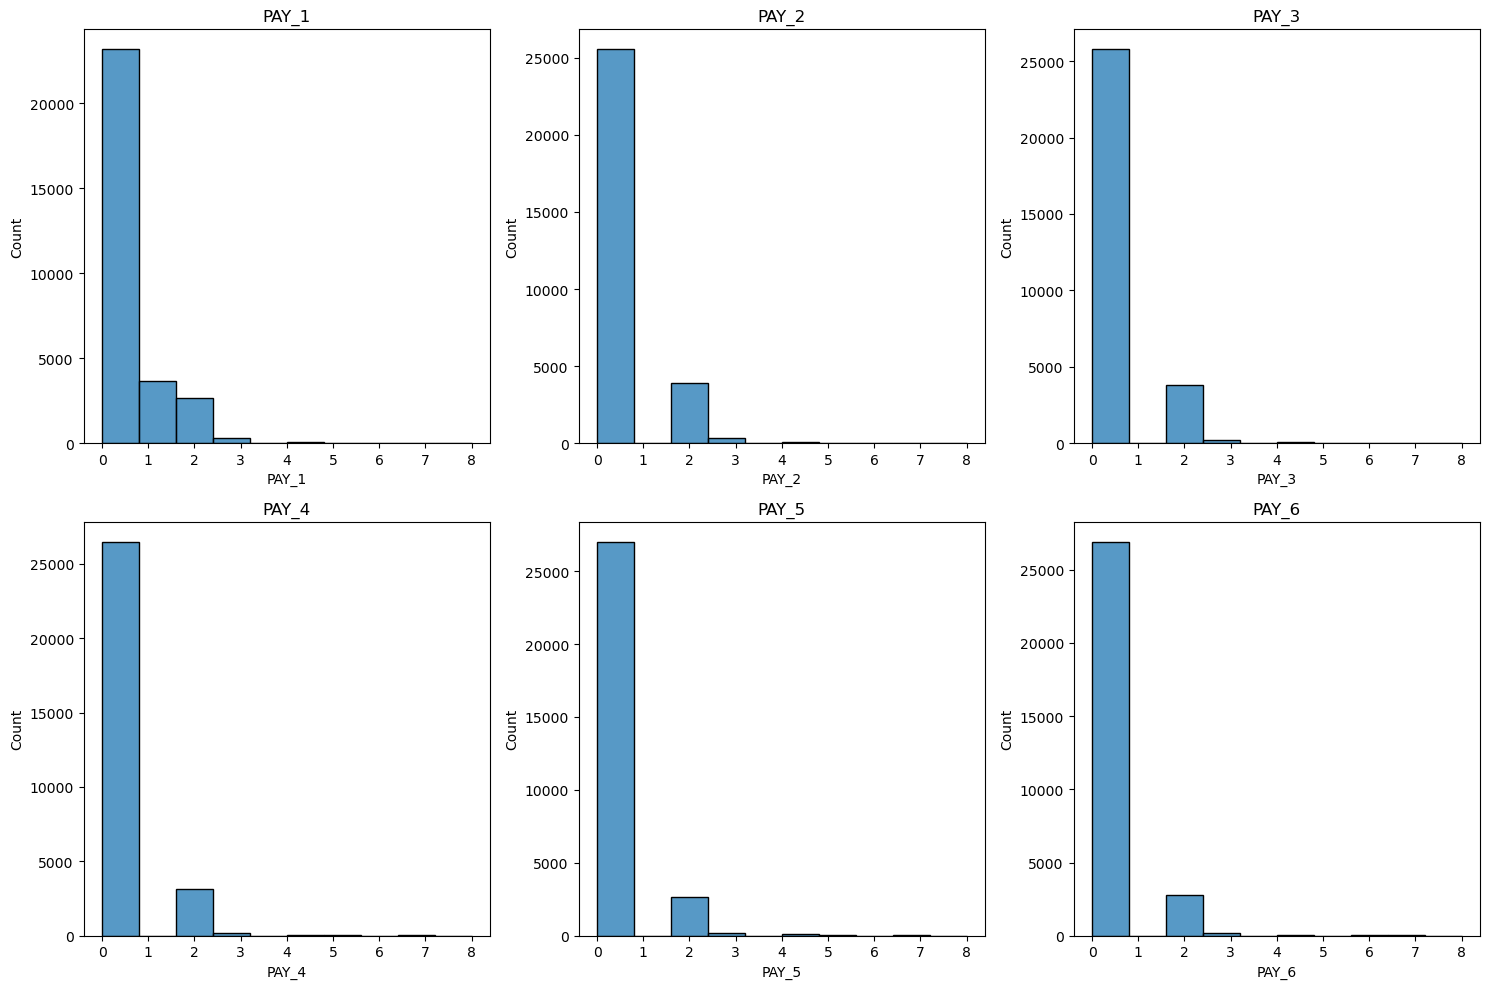

In [18]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

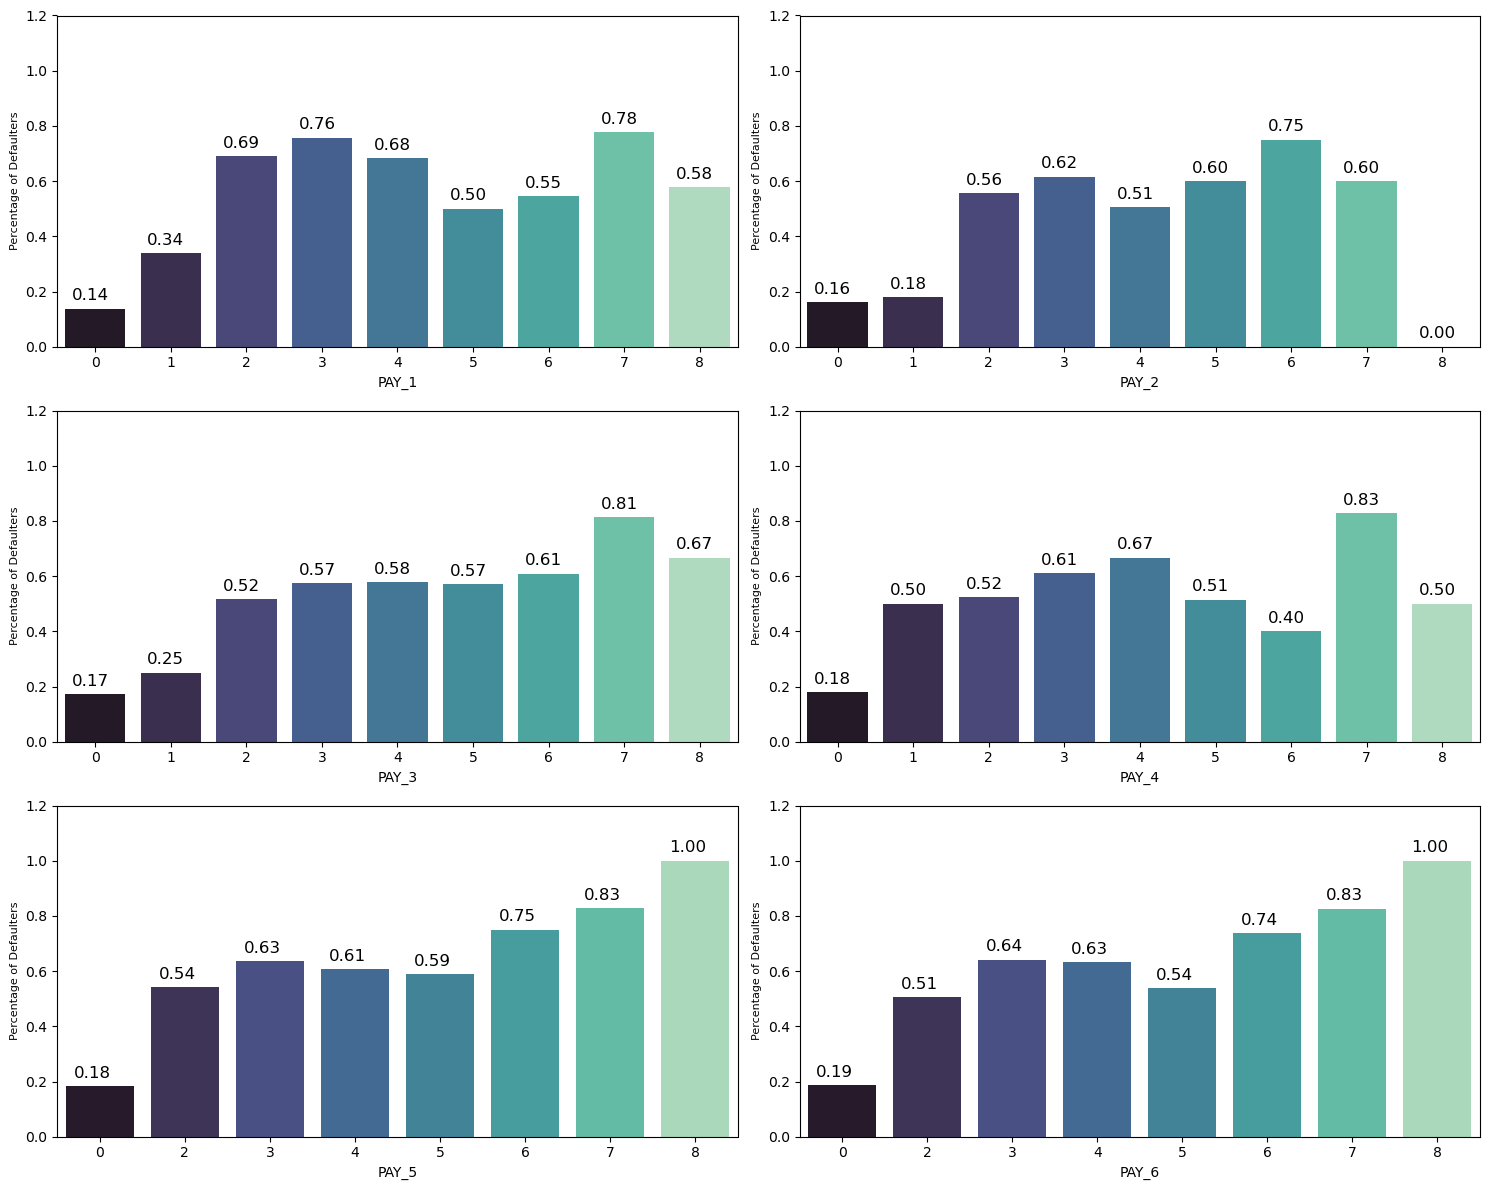

In [19]:
pay_features = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))
for i, column in enumerate(pay_features):
    plt.subplot(3,2,i+1)
    ax = sns.barplot(x=column, y='def_status',data=df,palette='mako',ci=None)
    plt.ylabel("Percentage of Defaulters", fontsize=8)
    plt.ylim(0,1.2)
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate('%.2f' % p.get_height(), (p.get_x() + 0.09, p.get_height() + 0.03), fontsize=12)
plt.show()

Here we can see the customers ho paid their bills on time have less likelihood of defaulting. 

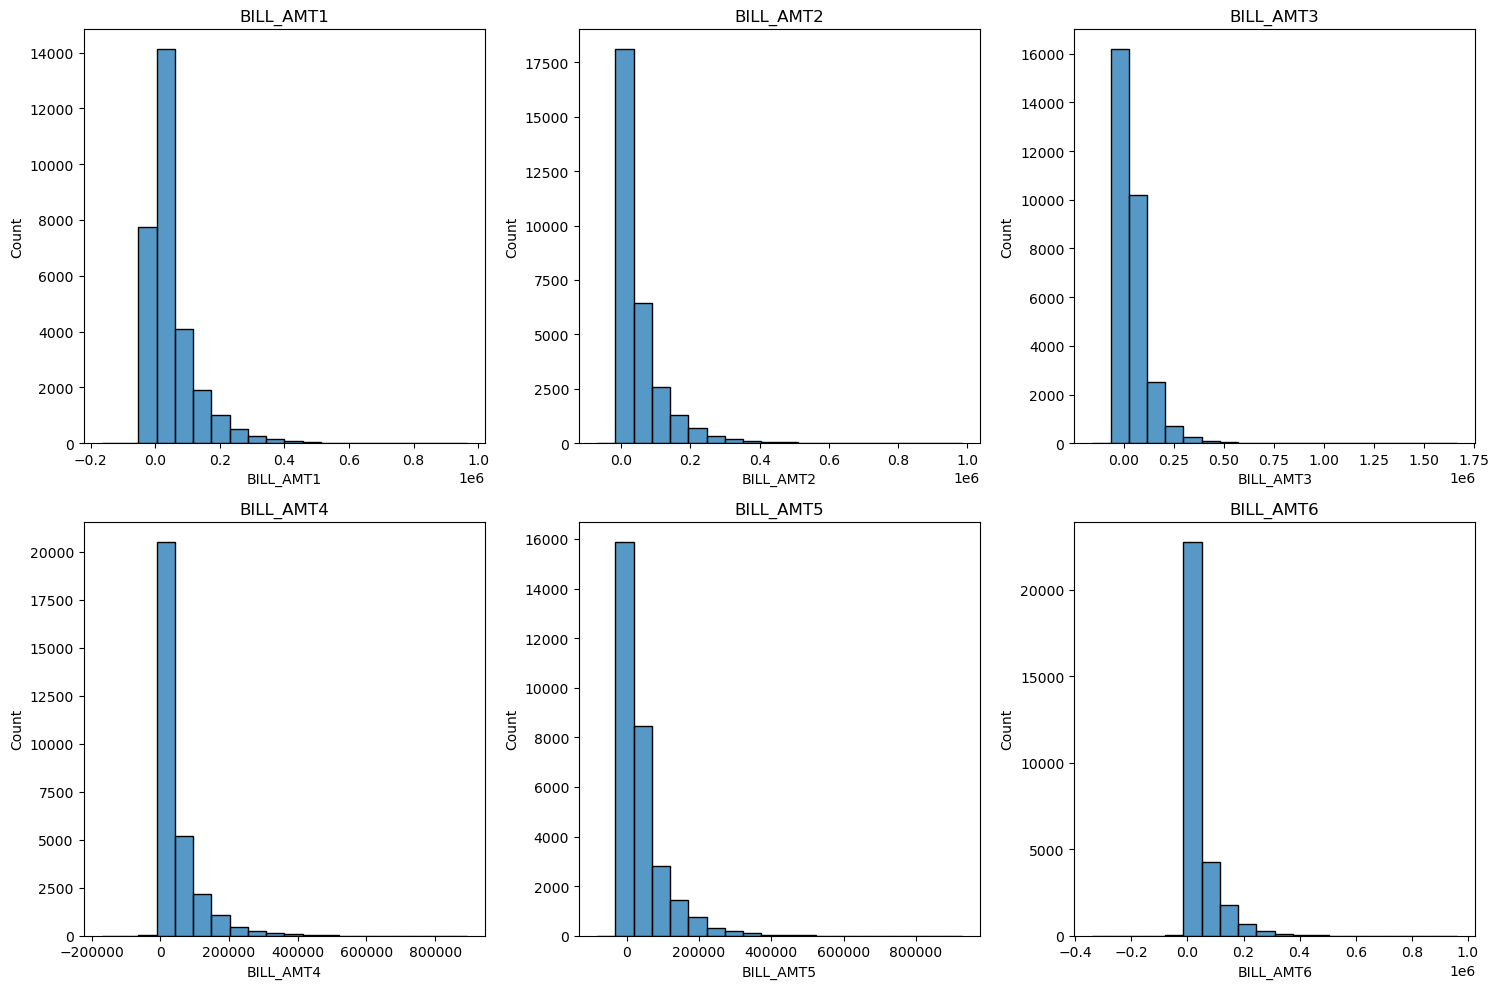

In [20]:
# Now let's plot Bill Amounts to get more in-depth understanding
bill_amounts= df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]

draw_histograms(bill_amounts,bill_amounts.columns,2,3,20)

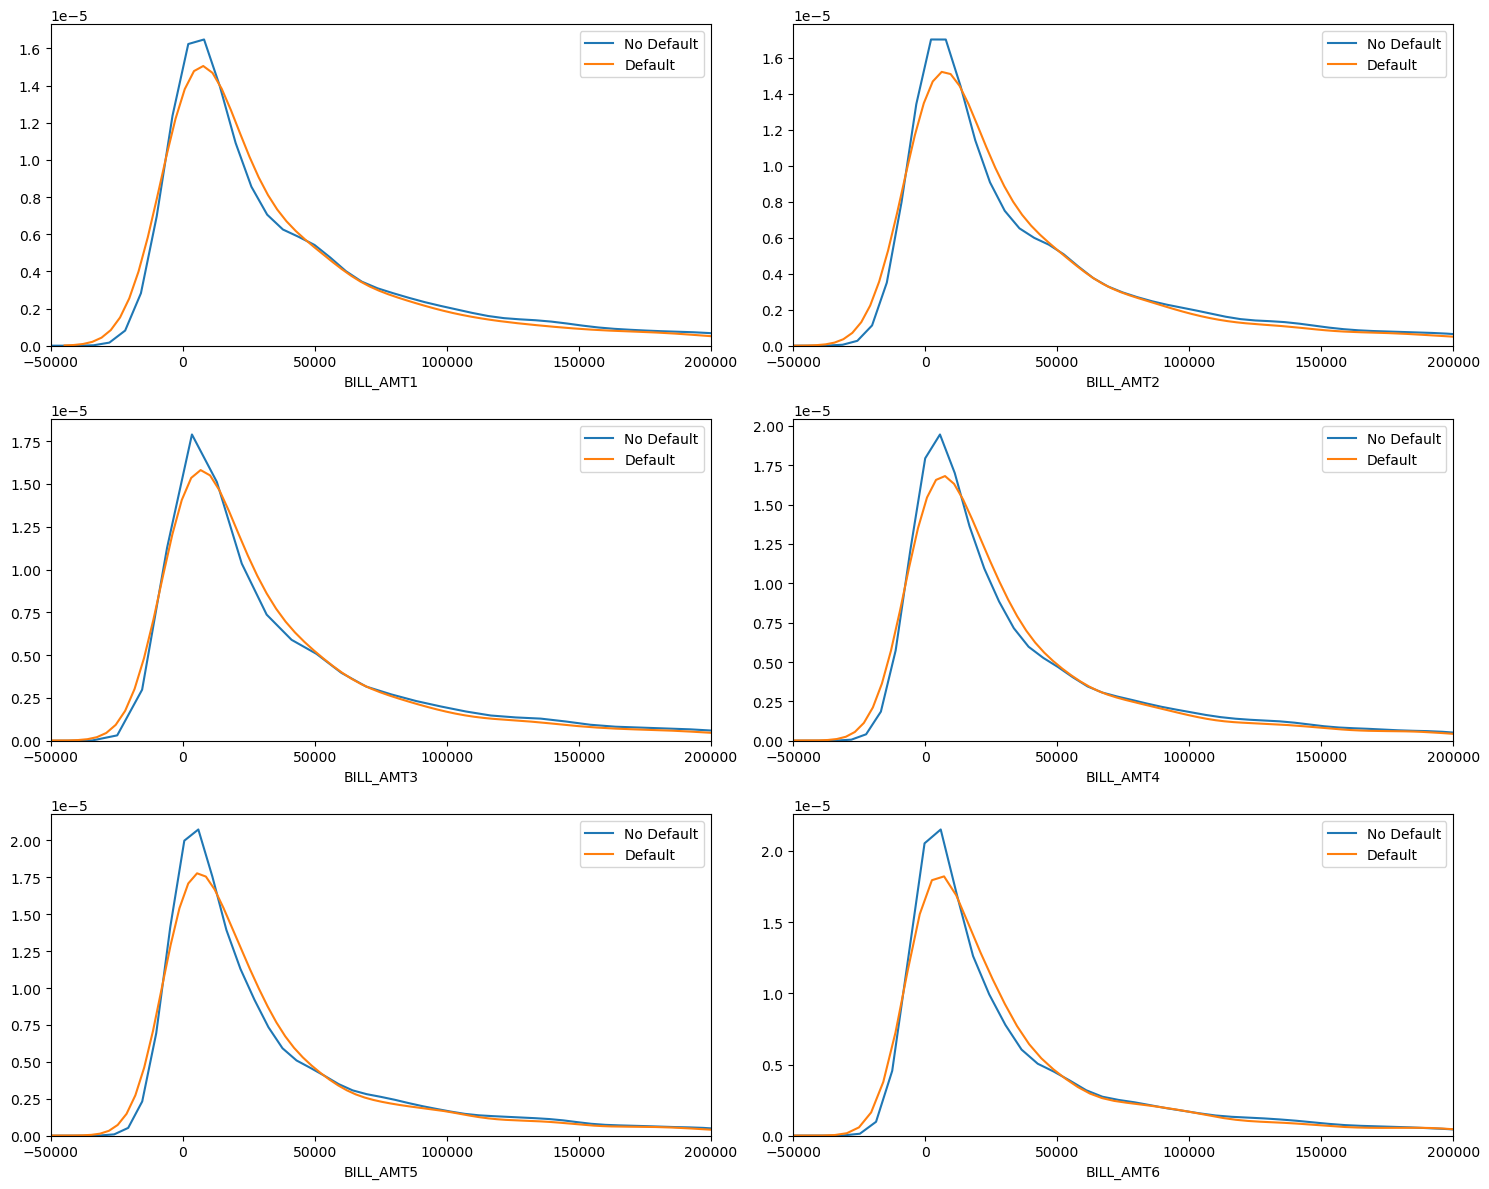

In [24]:
plt.figure(figsize=(15,12))
for i,columns in enumerate(bill_amounts):
    plt.subplot(3,2,i+1)
    sns.kdeplot(df.loc[(df['def_status']==0),columns],label='No Default', fill=False)
    sns.kdeplot(df.loc[(df['def_status']==1),columns],label='Default',fill=False)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
plt.show()

We can certainly see here that the overlap between defaulters and non-defaulters exists in the data to 
to get more in-depth analysis let's plot histograms with n-bins 


In [21]:
df['BILL_AMT1_bin']=df['BILL_AMT1'].copy()
df['BILL_AMT2_bin']=df['BILL_AMT2'].copy()
df['BILL_AMT3_bin']=df['BILL_AMT3'].copy()
df['BILL_AMT4_bin']=df['BILL_AMT4'].copy()
df['BILL_AMT5_bin']=df['BILL_AMT5'].copy()
df['BILL_AMT6_bin']=df['BILL_AMT6'].copy()

In [22]:
bill_amount_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']
for i, column in enumerate(bill_amount_bins):
    df[column] = pd.cut(df[bill_amounts.columns[i]], [-350000, -1, 0, 25000, 75000, 200000, 2000000])
    

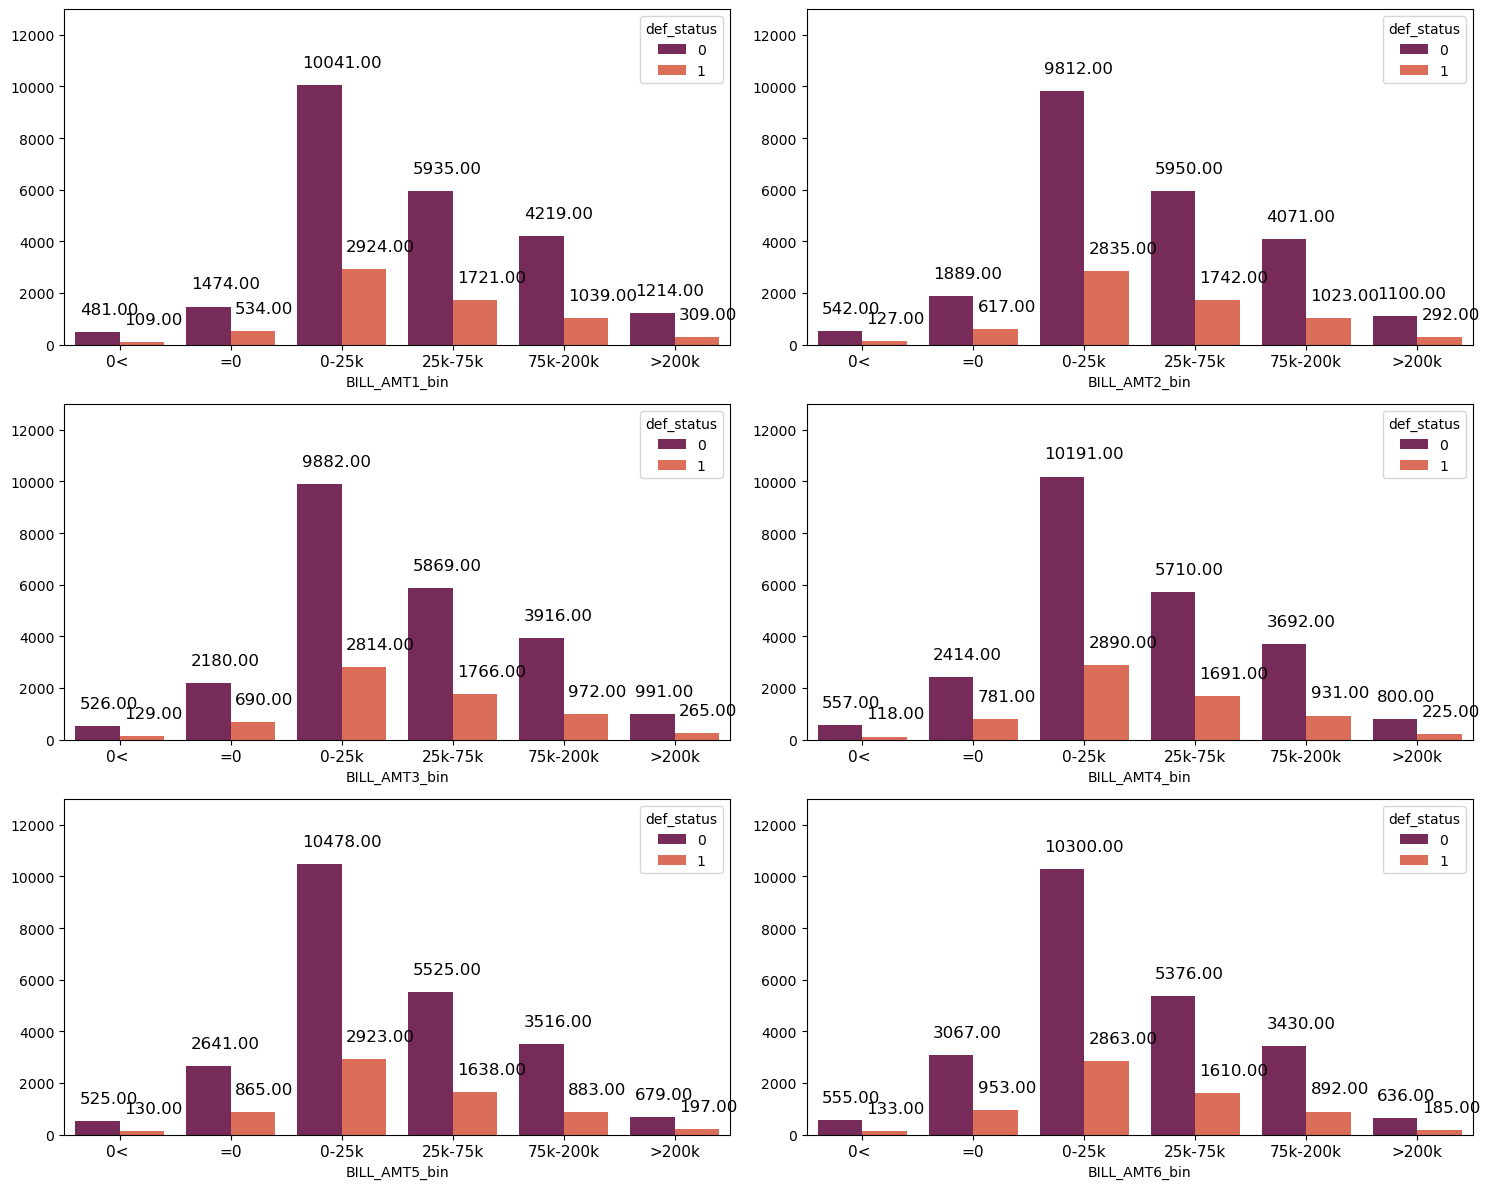

In [23]:
plt.figure(figsize=(15,12))
for i, column in enumerate(bill_amount_bins):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(data=df, x=column, hue='def_status',palette='rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0< ','=0','0-25k','25k-75k','75k-200k','>200k'],fontsize=11)
    plt.tight_layout()
    for p in ax.patches:
         ax.annotate('%.2f' % p.get_height(), (p.get_x() + 0.04, p.get_height() + 700), fontsize=12)
plt.show()

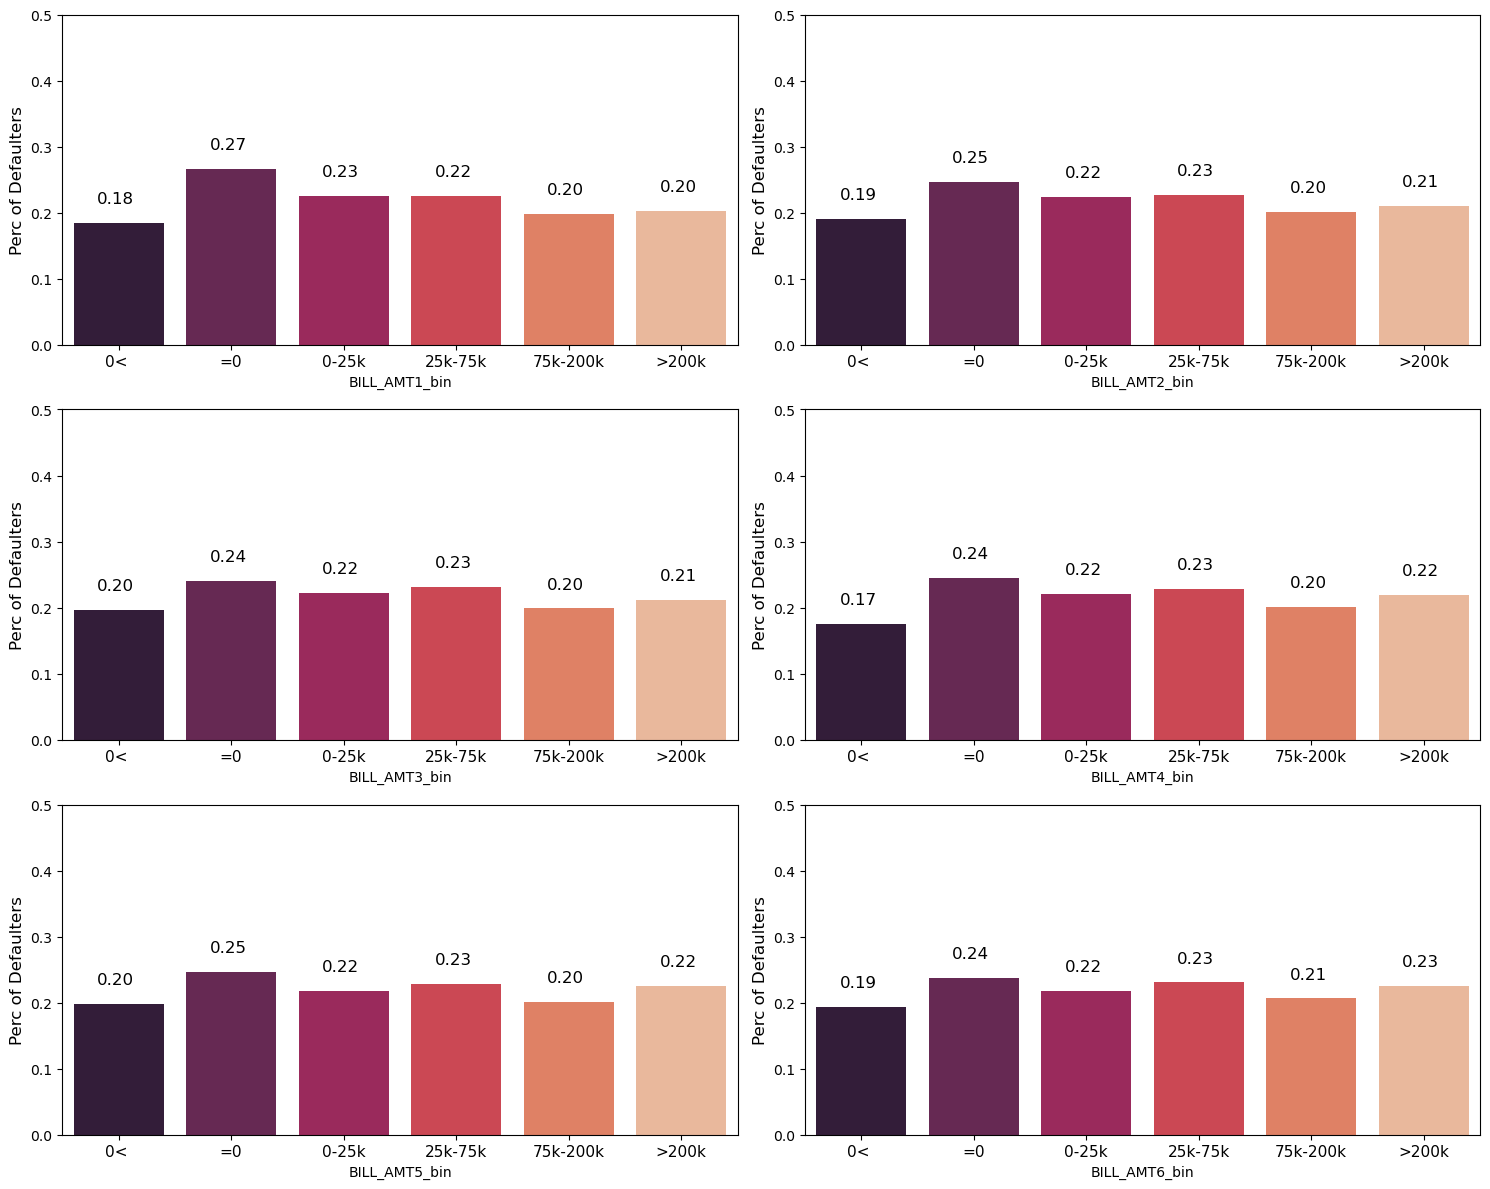

In [25]:
plt.figure(figsize=(15,12))
for i, column in enumerate(bill_amount_bins):
    plt.subplot(3,2,i+1)
    ax= sns.barplot(x=column,y='def_status',data=df,palette='rocket',ci=None)
    plt.ylabel('Perc of Defaulters',fontsize=12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0< ','=0','0-25k','25k-75k','75k-200k','>200k'],fontsize=11)
    plt.tight_layout()
    for p in ax.patches:
         ax.annotate('%.2f' % p.get_height(), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=12)
plt.show()

Here it can be observed that the people who have negative bill amount have a little less probablity of default


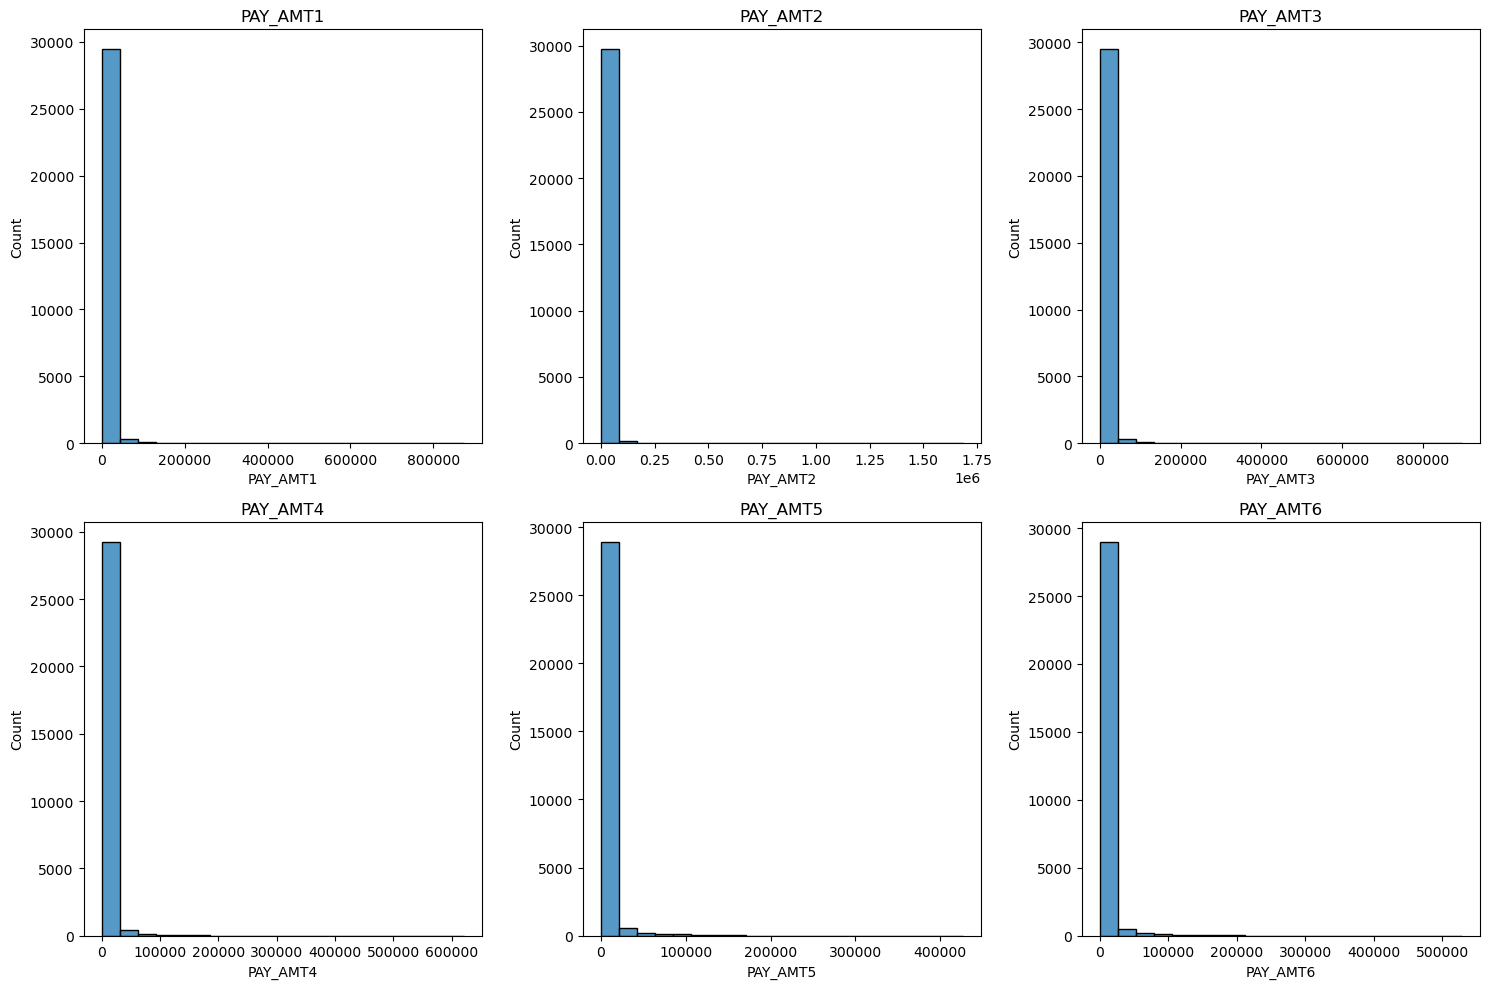

In [26]:
# Let's Explore the Amount of previous payments
paid_amounts = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
draw_histograms(paid_amounts,paid_amounts.columns,2,3,20)


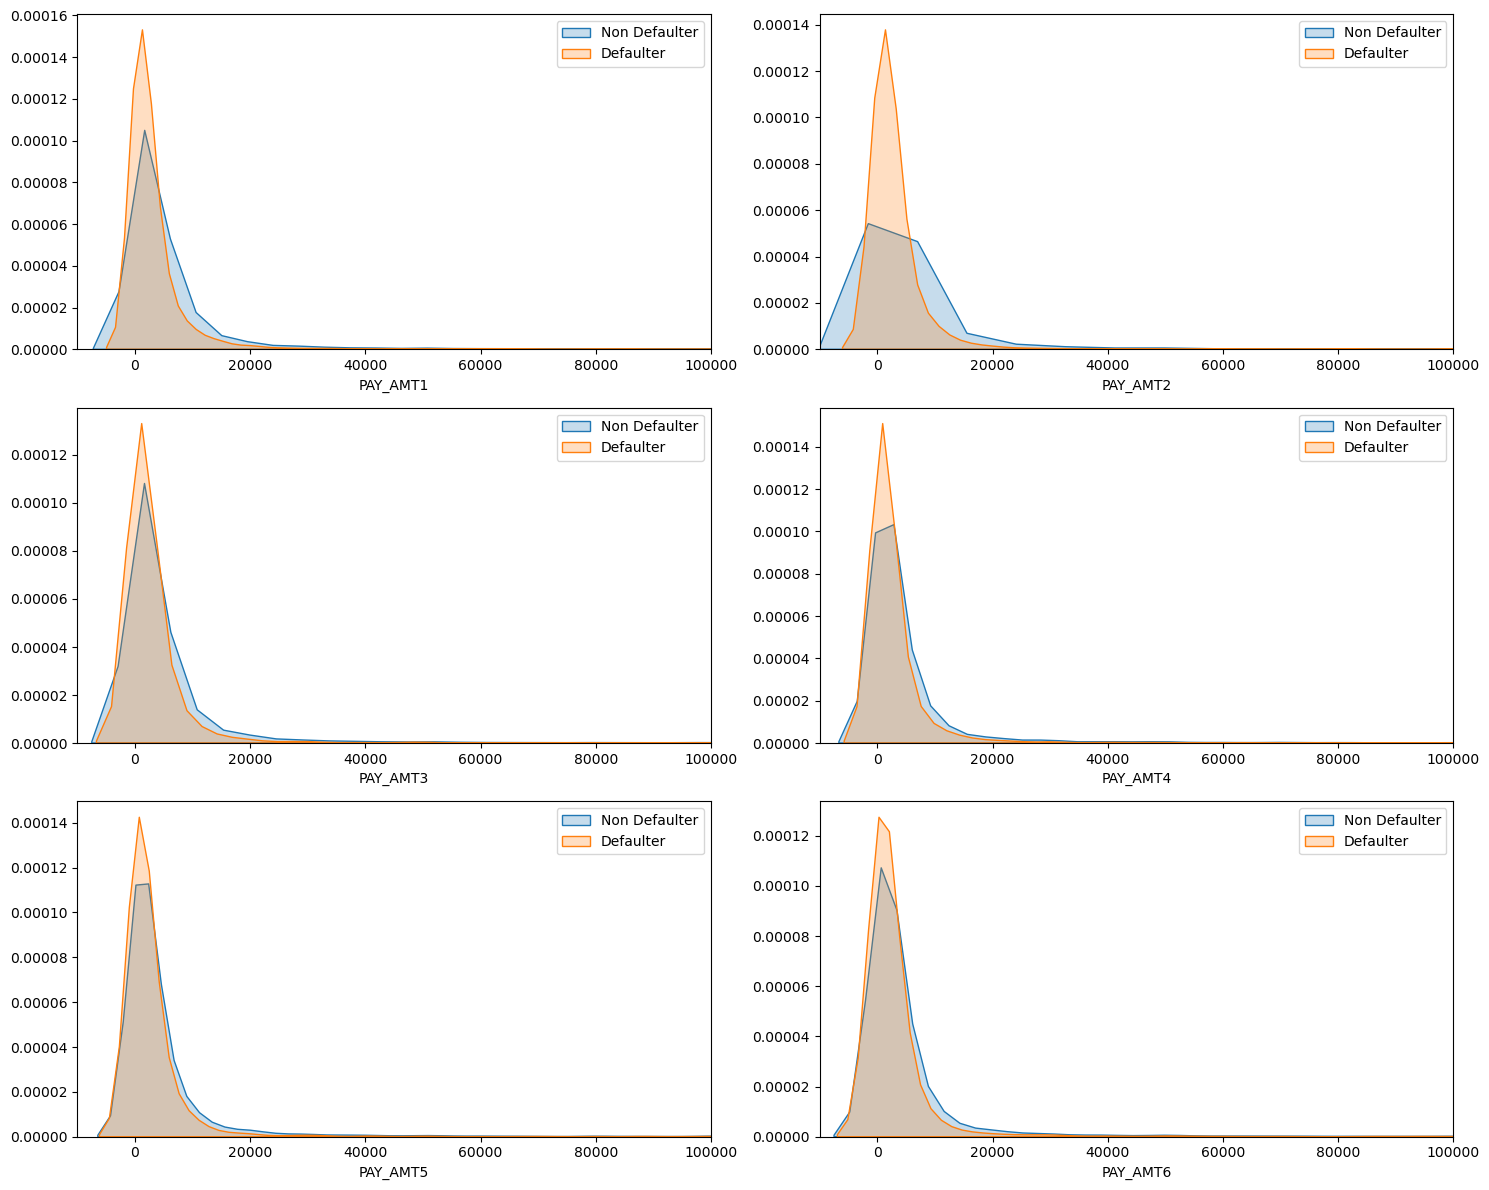

In [27]:
plt.figure(figsize=(15,12))
for i, column in enumerate(paid_amounts):
    plt.subplot(3,2,i+1)
    sns.kdeplot(df.loc[(df['def_status']==0),column],label="Non Defaulter",fill=True)
    sns.kdeplot(df.loc[(df['def_status']==1),column],label="Defaulter",fill=True)
    plt.xlim(-10000,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
plt.show()

In [29]:
# NOW LET'S CREATE BINS TO HAVE MORE IN-DEPTH ANALYSIS 
df['PAY_AMT1_bin']=df['PAY_AMT1'].copy()
df['PAY_AMT2_bin']=df['PAY_AMT2'].copy()
df['PAY_AMT3_bin']=df['PAY_AMT3'].copy()
df['PAY_AMT4_bin']=df['PAY_AMT4'].copy()
df['PAY_AMT5_bin']=df['PAY_AMT5'].copy()
df['PAY_AMT6_bin']=df['PAY_AMT6'].copy()

In [30]:
paid_amount_bins = ['PAY_AMT1_bin','PAY_AMT2_bin','PAY_AMT3_bin','PAY_AMT4_bin','PAY_AMT5_bin','PAY_AMT6_bin']
for i, column in enumerate(paid_amount_bins):
    df[column]=pd.cut(df[paid_amount_bins[i]],[-1,0,25000,50000,100000,2000000])

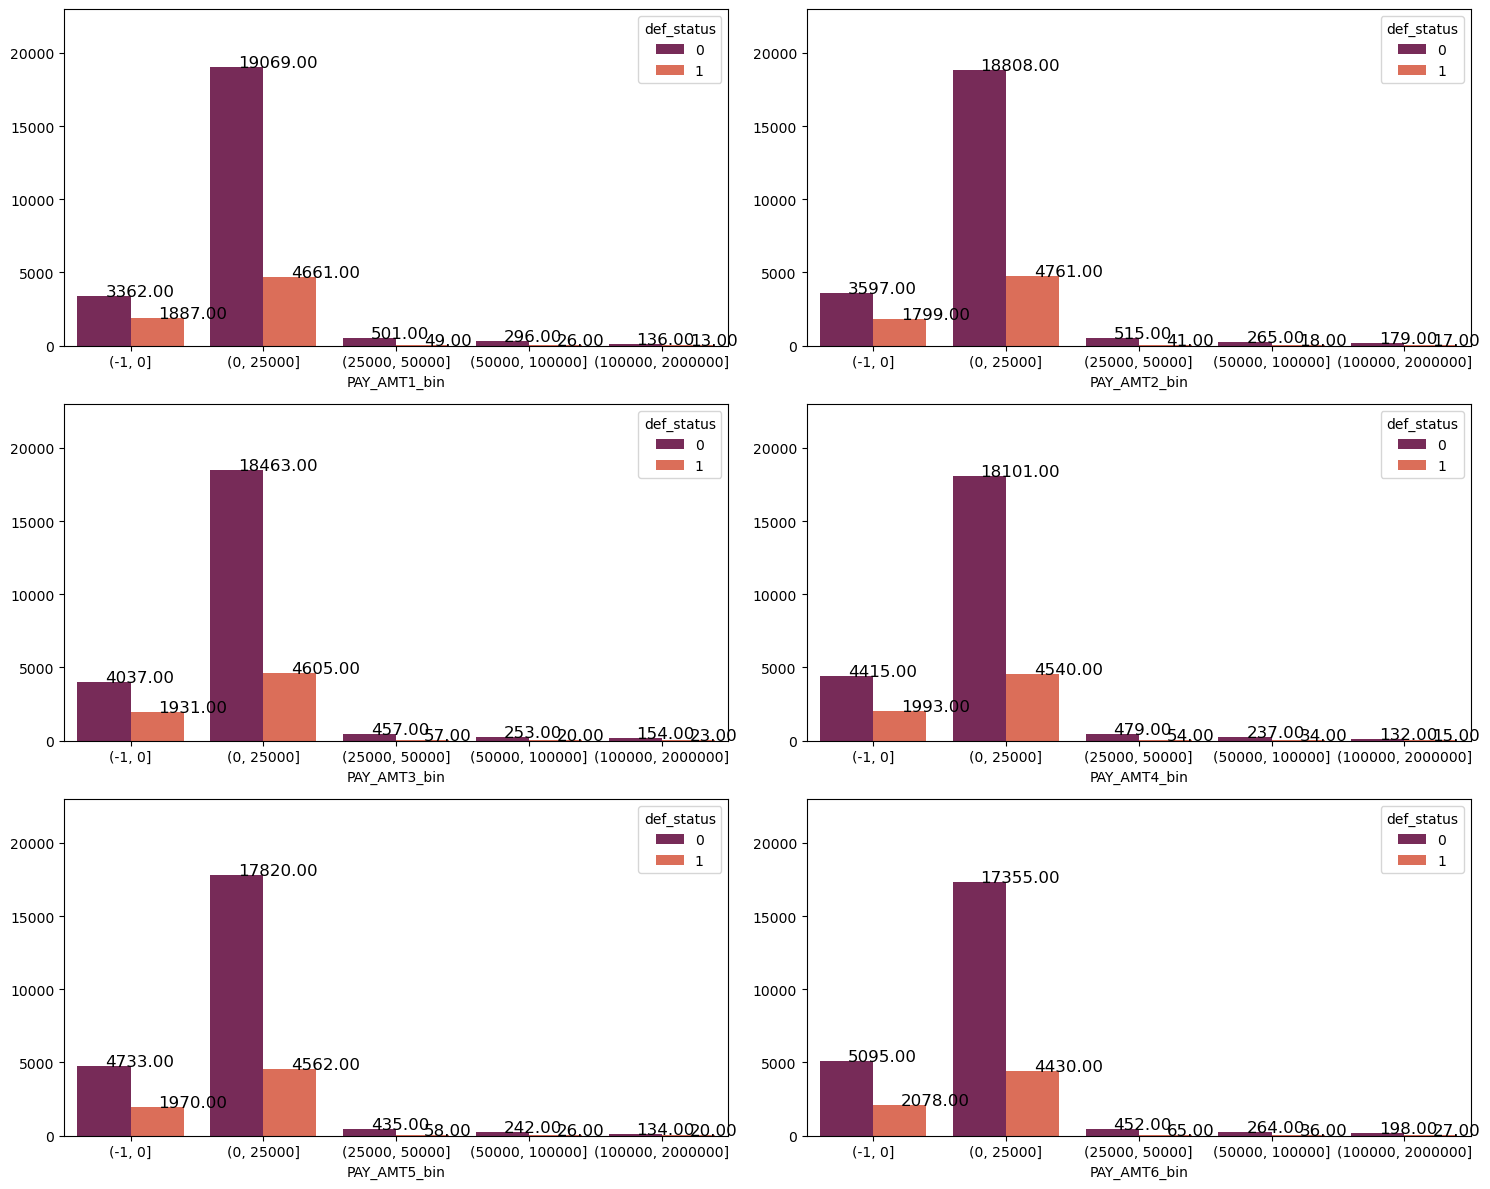

In [31]:
plt.figure(figsize=(15,12))
for i, column in enumerate(paid_amount_bins):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(data = df, x=column, hue='def_status',palette='rocket')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate('%.2f' % p.get_height(), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=12)
plt.show()

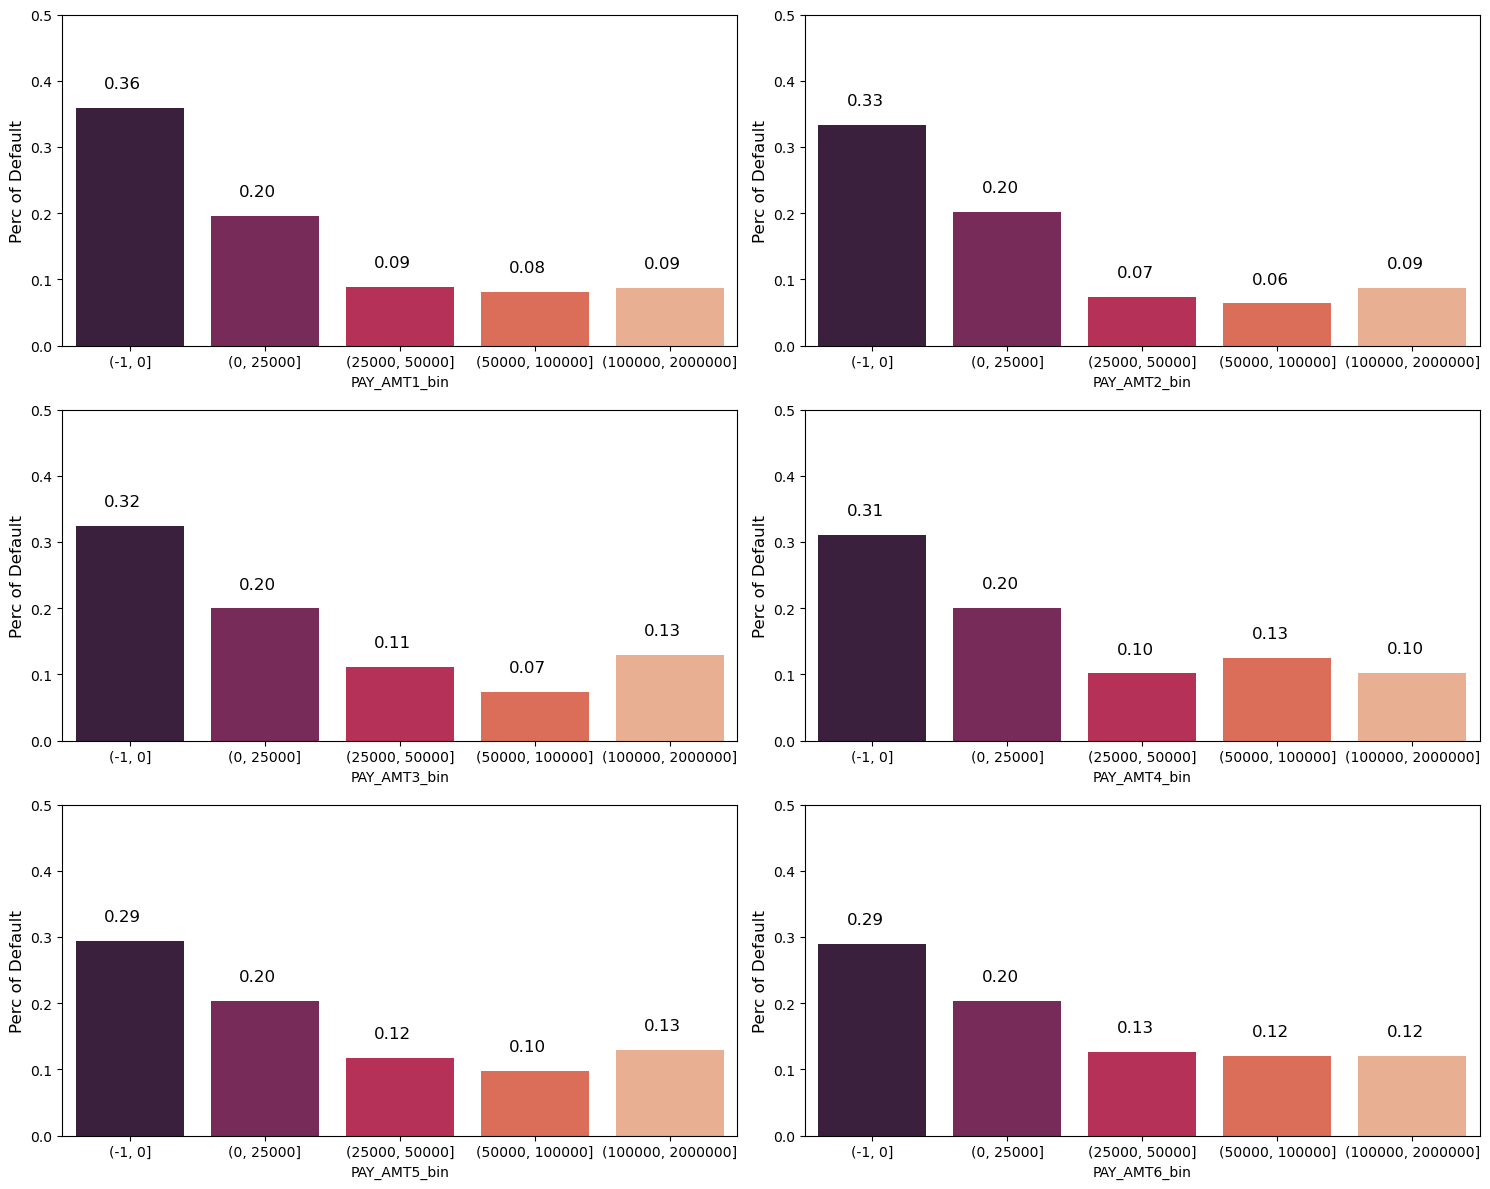

In [32]:
plt.figure(figsize=(15,12))
for i, column in enumerate(paid_amount_bins):
    plt.subplot(3,2,i+1)
    ax= sns.barplot(x=column,y='def_status',data=df, palette='rocket',ci=None)
    plt.ylabel('Perc of Default',fontsize=12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate('%.2f' % p.get_height(), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=12)
plt.show()

people who've paid more have 25k have less default probablity 


Let's take into consideration now the categorical columns. 

SEX
   Value  Count  Percentage
1      1  11888   39.626667
2      2  18112   60.373333
------------


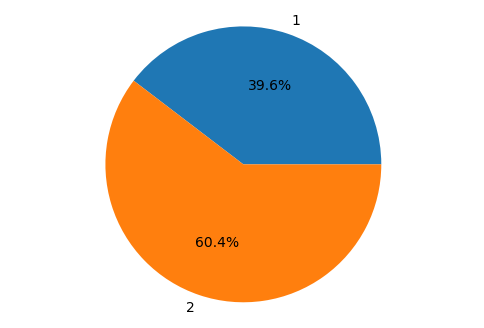

MARRIAGE
   Value  Count  Percentage
1      1  13659   45.530000
2      2  15964   53.213333
3      3    377    1.256667
------------


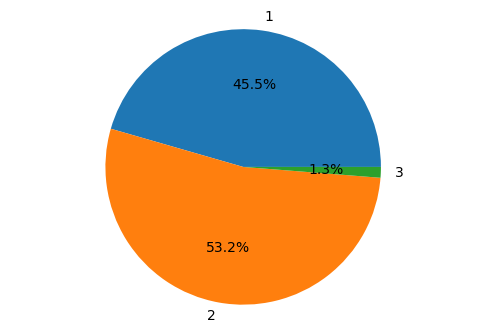

EDUCATION
   Value  Count  Percentage
1      1  10585   35.283333
2      2  14030   46.766667
3      3   4917   16.390000
4      4    468    1.560000
------------


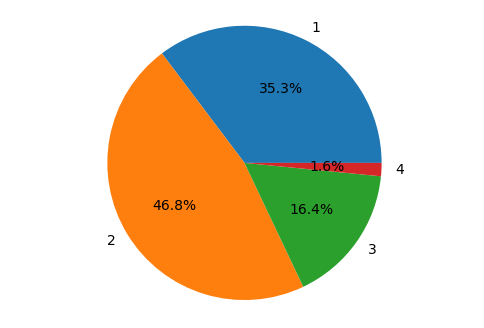

In [33]:
def show_value_counts(columns):
    print(columns)
    value_counts = df[columns].value_counts()
    percentage = value_counts/len(df)*100
    results_df = pd.DataFrame({'Value': value_counts.index,'Count': value_counts, 'Percentage': percentage })
    results_df = results_df.sort_values(by='Value')
    print(results_df)
    print('------------')
    generate_pie_plot(results_df)
def generate_pie_plot(data_frame):
    plt.figure(figsize=(6,4))
    plt.pie(data_frame['Count'],labels=data_frame['Value'],autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()
show_value_counts('SEX')
show_value_counts('MARRIAGE')
show_value_counts('EDUCATION')
                  

Number of women is more than men 
More number of credit card holders are university and highschool students 

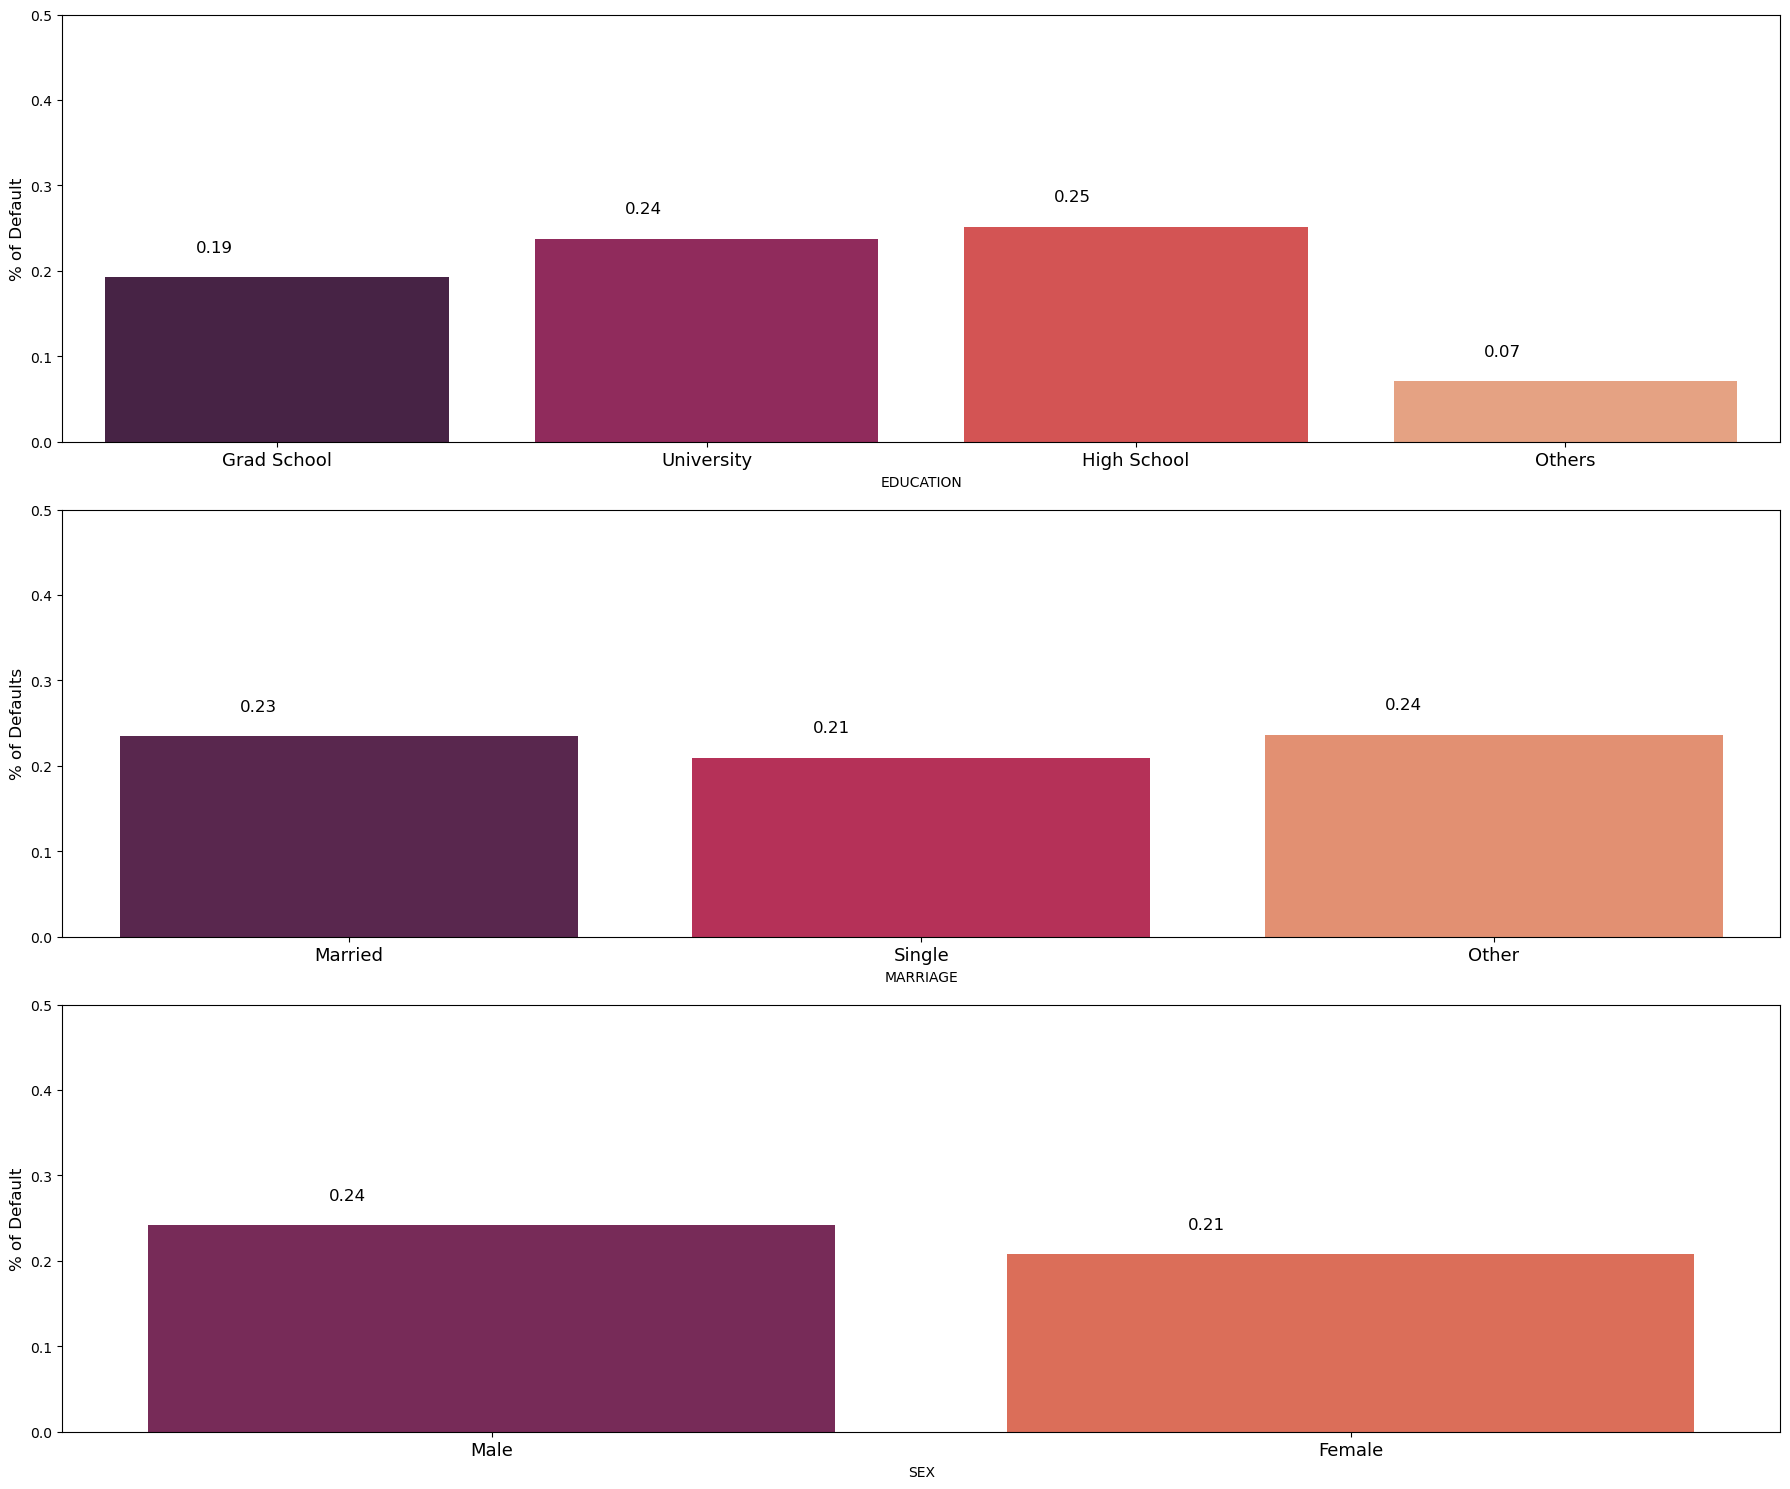

In [34]:
# Now create bar plots for MARRIAGE, EDUCATION AND SEX 
# BAR plot for EDUCATION
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18,15))
ed = sns.barplot(x='EDUCATION',y='def_status',data=df, palette='rocket',ci=None, ax=axes[0])
ed.set_ylabel("% of Default",fontsize=12)
ed.set_ylim(0,0.5)
ed.set_xticks([0,1,2,3])
ed.set_xticklabels(['Grad School','University','High School','Others'],fontsize=13)
for p in ed.patches:
    ed.annotate('%.2f' % p.get_height(), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=12)
mar = sns.barplot(x='MARRIAGE',y='def_status',data=df,palette='rocket',ci=None,ax=axes[1])
mar.set_ylabel("% of Defaults",fontsize=12)
mar.set_ylim(0,0.5)
mar.set_xticks([0,1,2])
mar.set_xticklabels(['Married','Single','Other'],fontsize=13)
for p in mar.patches:
    mar.annotate('%.2f' % p.get_height(), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=12)
s = sns.barplot(x='SEX',y='def_status',data=df,palette='rocket',ci=None,ax=axes[2])
s.set_ylabel("% of Default",fontsize=12)
s.set_ylim(0,0.5)
s.set_xticks([0,1])
s.set_xticklabels(['Male','Female'],fontsize=13)
for p in s.patches:
    s.annotate('%.2f' % p.get_height(), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=12)
plt.tight_layout()
plt.show()

Higher educated individuals have low default rates 
Married and others categories have a bit more higher probablitites of default which is 0.23 and 0.24 while
Unmarreid has 0.21 
males are a little more likely to default. 


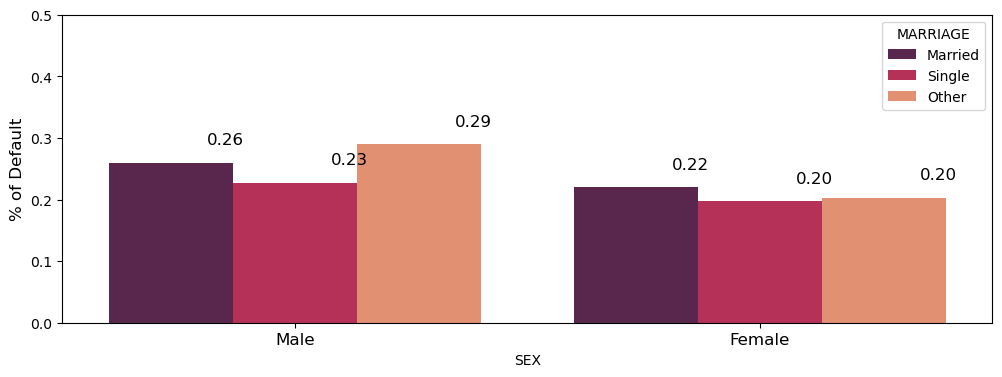

In [35]:
plt.figure(figsize=(12,4))
s_m = sns.barplot(x='SEX',y='def_status', hue='MARRIAGE', data=df, palette= 'rocket',ci=None)
plt.ylabel('% of Default', fontsize=12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male','Female'], fontsize=12)
plt.legend(['Married','Single','Other'],title='MARRIAGE')
for p in s_m.patches: 
    s_m.annotate('%.2f' % p.get_height(), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=12)
plt.show()

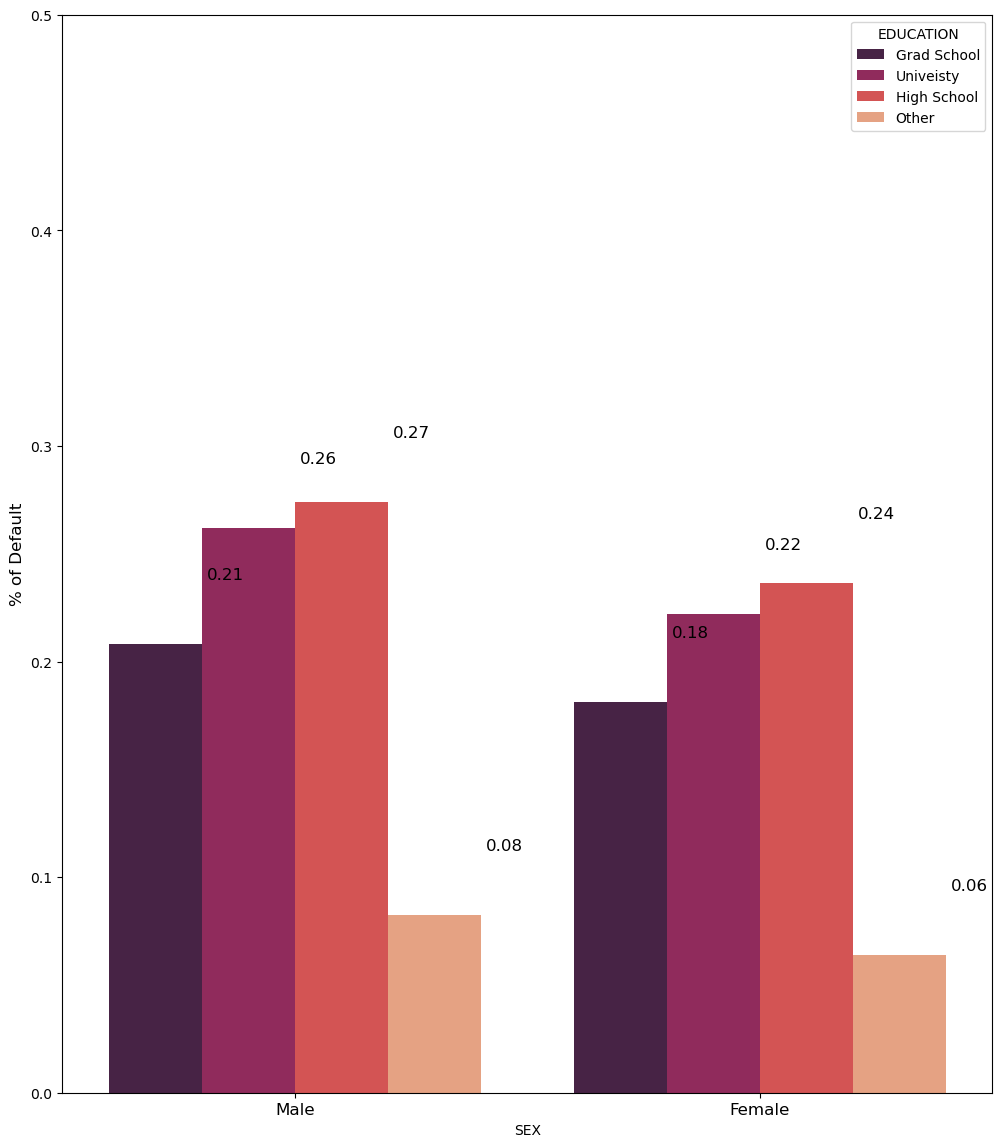

In [36]:
plt.figure(figsize=(12,14))
ax= sns.barplot(x="SEX",y="def_status",hue="EDUCATION",data=df,palette='rocket',ci=None)
plt.ylabel("% of Default",fontsize=12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male','Female'], fontsize=12)
plt.legend(['Grad School','Univeisty','High School','Other'],title='EDUCATION')
for p in ax.patches:
    ax.annotate('%.2f' % p.get_height(), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=12)
plt.show()

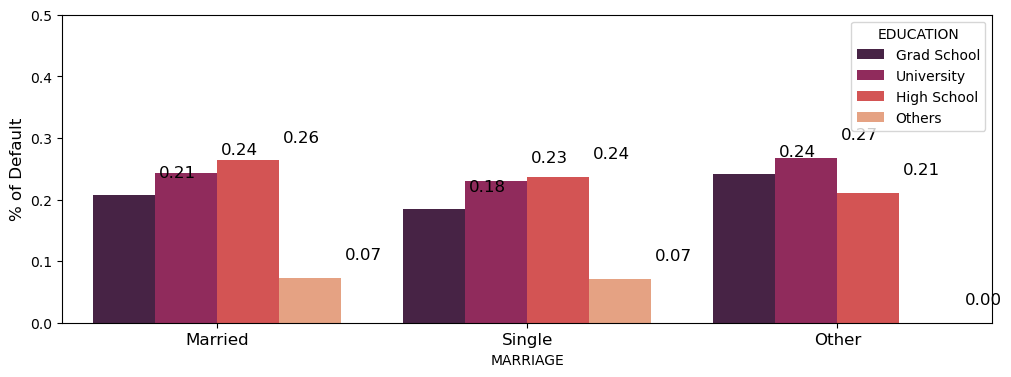

In [37]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x="MARRIAGE",y='def_status',hue="EDUCATION",data=df,palette='rocket',ci=None)
plt.ylabel('% of Default',fontsize=12)
plt.ylim(0,0.5)
plt.xticks([0,1,2], ['Married','Single','Other'], fontsize=12)
plt.legend(['Grad School', 'University','High School','Others'],title="EDUCATION")
for p in ax.patches:
    ax.annotate('%.2f' % p.get_height(), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=12)
plt.show()

Married Male with high school education have more likelihood of default. 
Single University educated individulas have the lowest propablity of default. 

<AxesSubplot:xlabel='AGE', ylabel='Count'>

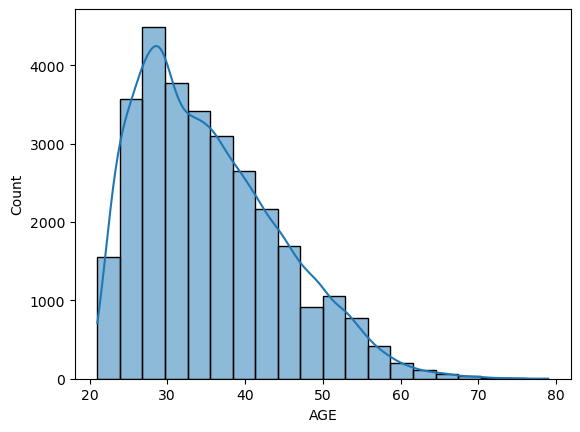

In [39]:
# Let's Explore AGE 
sns.histplot(df['AGE'],bins=20,kde=True)

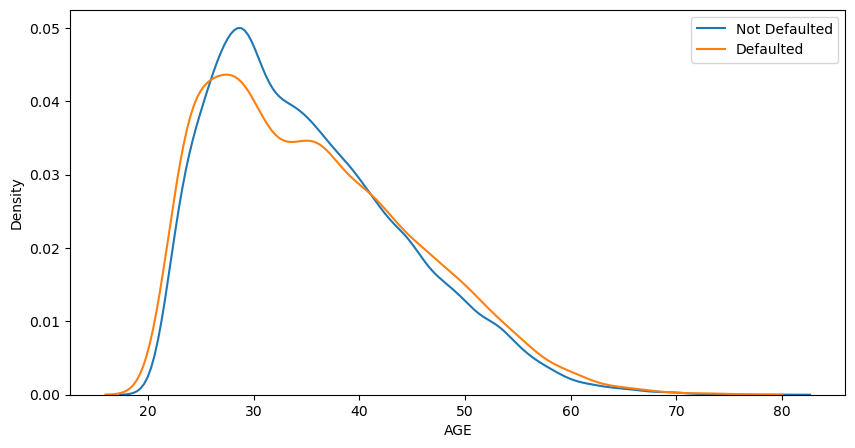

In [40]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[(df['def_status']==0),'AGE'],label='Not Defaulted', fill=False)
sns.kdeplot(df.loc[(df['def_status']==1),'AGE'],label='Defaulted', fill=False)
plt.legend()
plt.show()

People between the age of 20 and 30 seem to have high likelihood of default

Let's Create Bin to have more in-depth analysis

In [41]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


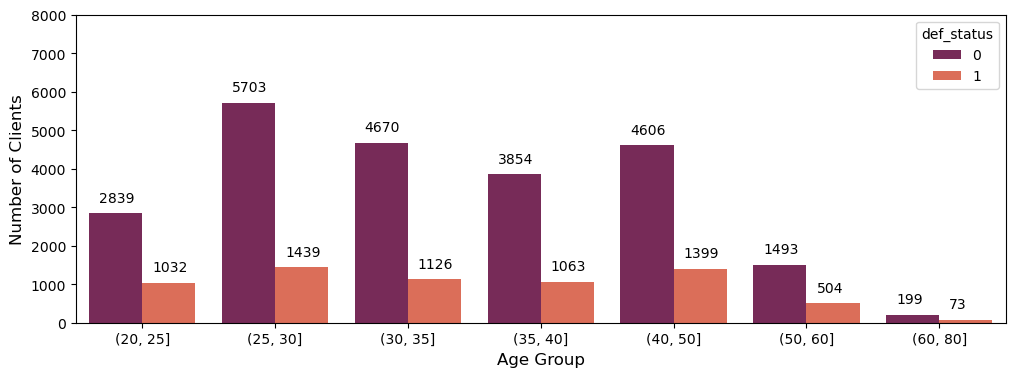

In [48]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="def_status", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

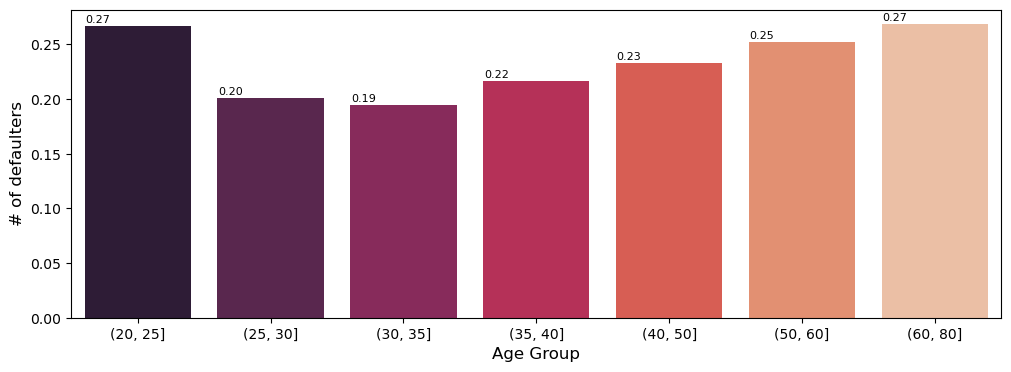

In [49]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x='AgeBin',y='def_status',data=df,palette = 'rocket',ci=None,order=AgeBin_order)
plt.xlabel("Age Group",fontsize=12)
plt.ylabel("# of defaulters", fontsize=12)
for p in ax.patches:
    ax.annotate("%.02f"%(p.get_height()),(p.get_x()+0.005,p.get_height()+0.003),fontsize=8)
plt.show()

People between age 20 and 25 as well as above 60 are more likely to default on their payments 

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

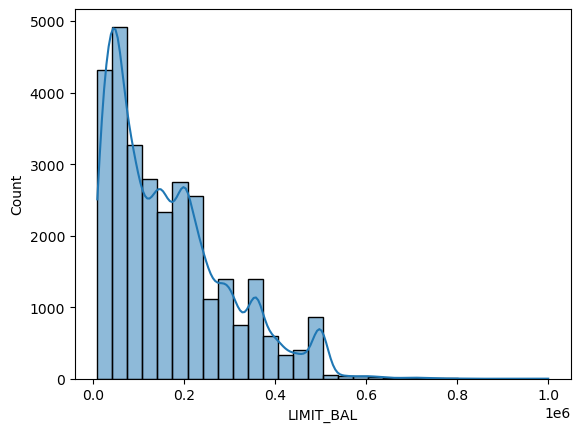

In [50]:
sns.histplot(df['LIMIT_BAL'],bins=30,kde=True)

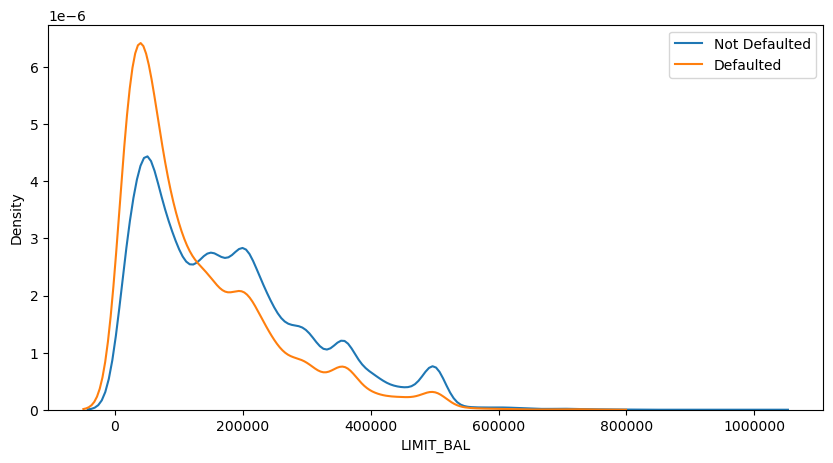

In [51]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[(df['def_status']==0),'LIMIT_BAL'],label='Not Defaulted', fill=False)
sns.kdeplot(df.loc[(df['def_status']==1),'LIMIT_BAL'],label='Defaulted', fill=False)
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()

In [52]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

More people have limit balance below 25000 NT dollars, However the upper limit exceeds 1M NT Dollars


In [53]:
# Lets further Analyze the Limit Balance Category. 
df['LIMIT_BAL_bin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LIMIT_BAL_bin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LIMIT_BAL_bin, dtype: int64


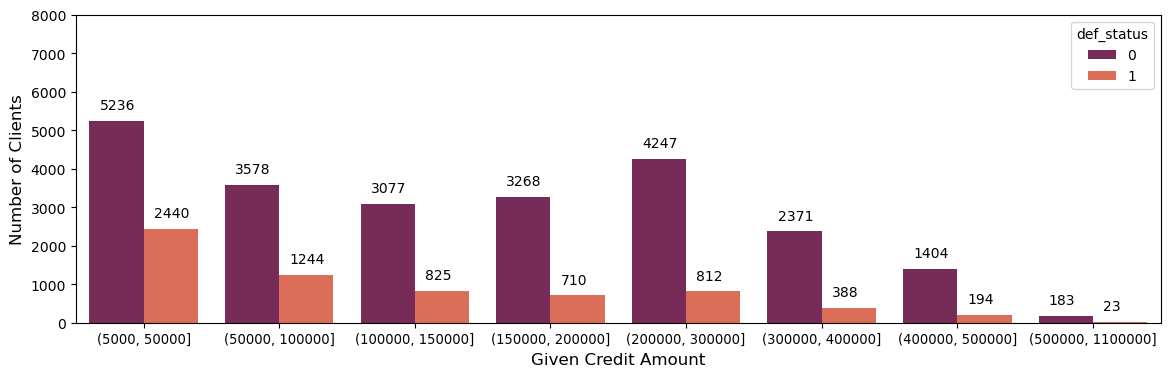

In [54]:
plt.figure(figsize=(14,4))
df['LIMIT_BAL_bin']=df['LIMIT_BAL_bin'].astype('str')
LIMIT_BAL_bin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']
ax = sns.countplot(data=df,x='LIMIT_BAL_bin',hue='def_status',palette='rocket',order=LIMIT_BAL_bin_order)
plt.xlabel("Given Credit Amount",fontsize=12)
plt.ylabel("Number of Clients",fontsize=12)
plt.ylim(0,8000)
ax.tick_params(axis="x",labelsize=9.5)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))
plt.show()
    

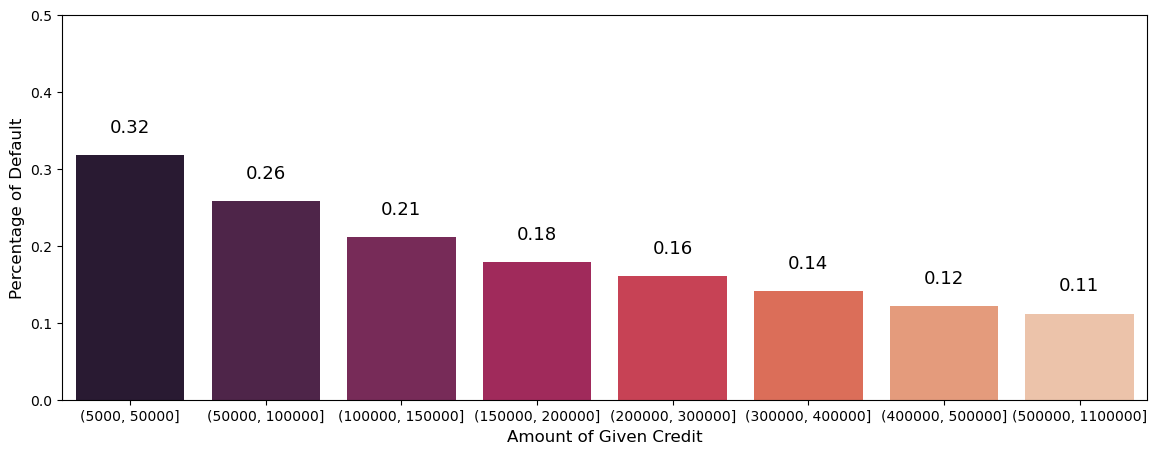

In [44]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x="LIMIT_BAL_bin",y="def_status",data=df,palette="rocket",ci=None,order=LIMIT_BAL_bin_order)
plt.xlabel("Amount of Given Credit",fontsize=12)
plt.ylabel("Percentage of Default",fontsize=12)
plt.ylim(0,0.5)
for p in ax.patches: 
    ax.annotate('%.2f'%(p.get_height()),(p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

When the amount of credit is less, the number of defaulters is increase. Significant decrease in defaulters is observed with respect to increased credit limit

In [55]:
# Relation between Limit Balance and other variables. 
#Group by and calculate mean by each category. 
mean_by_sex = df.groupby('SEX')['LIMIT_BAL'].mean()
mean_by_education = df.groupby('EDUCATION')['LIMIT_BAL'].mean()
mean_by_marriage =df.groupby('MARRIAGE')['LIMIT_BAL'].mean()
mean_by_age_bin = df.groupby('AgeBin')['LIMIT_BAL'].mean()
print("Mean LIMIT_BAL by Sex")
print(mean_by_sex)
print("----------")
print('\nMean LIMIT_BAL by EDUCATION')
print(mean_by_education)
print('----------------------')
print("\nMean LIMIT_BAL by MARRIAGE:")
print(mean_by_marriage)

print('----------------------')
print("\nMean LIMIT_BAL by AGE_BIN:")
print(mean_by_age_bin)


Mean LIMIT_BAL by Sex
SEX
1    163519.825034
2    170086.462014
Name: LIMIT_BAL, dtype: float64
----------

Mean LIMIT_BAL by EDUCATION
EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    181316.239316
Name: LIMIT_BAL, dtype: float64
----------------------

Mean LIMIT_BAL by MARRIAGE:
MARRIAGE
1    182200.893184
2    156413.660737
3    103076.923077
Name: LIMIT_BAL, dtype: float64
----------------------

Mean LIMIT_BAL by AGE_BIN:
AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64


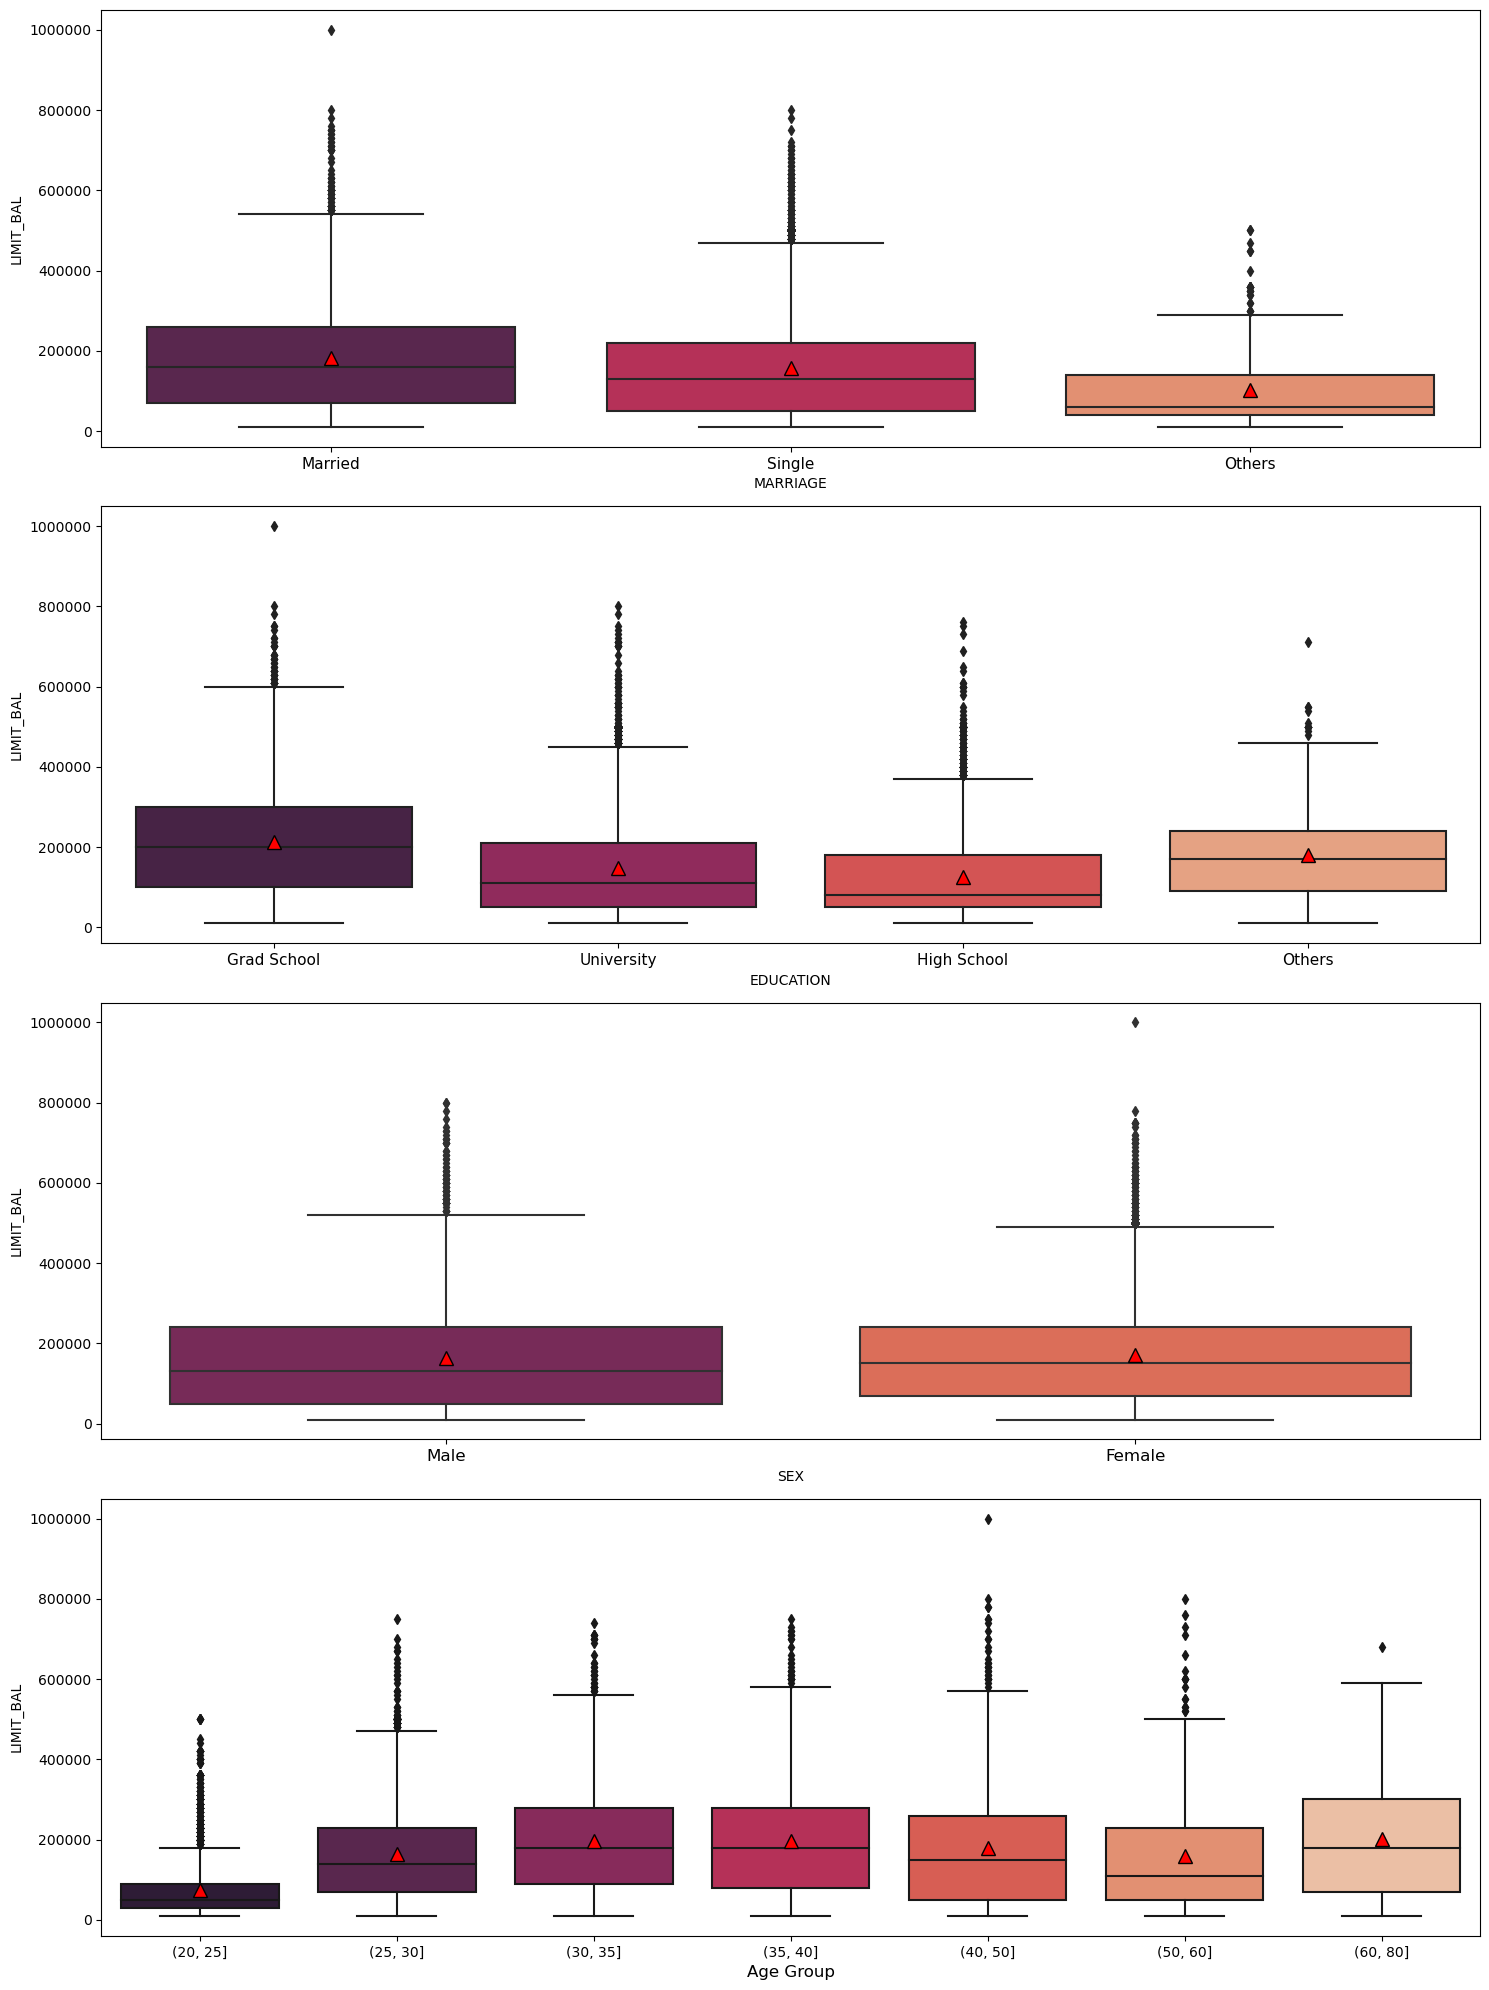

In [56]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 1, 1)
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", data=df, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'], fontsize=11)

plt.subplot(4, 1, 2)
sns.boxplot(x="EDUCATION", y="LIMIT_BAL", data=df, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3], ['Grad School', 'University', 'High School', 'Others'], fontsize=11)


plt.subplot(4, 1, 3)
sns.boxplot(x="SEX", y="LIMIT_BAL", data=df, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)

plt.subplot(4, 1, 4)
sns.boxplot(x="AgeBin", y="LIMIT_BAL", data=df, palette='rocket', showmeans=True, order=AgeBin_order,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Age Group", fontsize=12)

plt.tight_layout()
plt.show()

The highest credit limit given to a female, married and belongs to age group 40-50 years

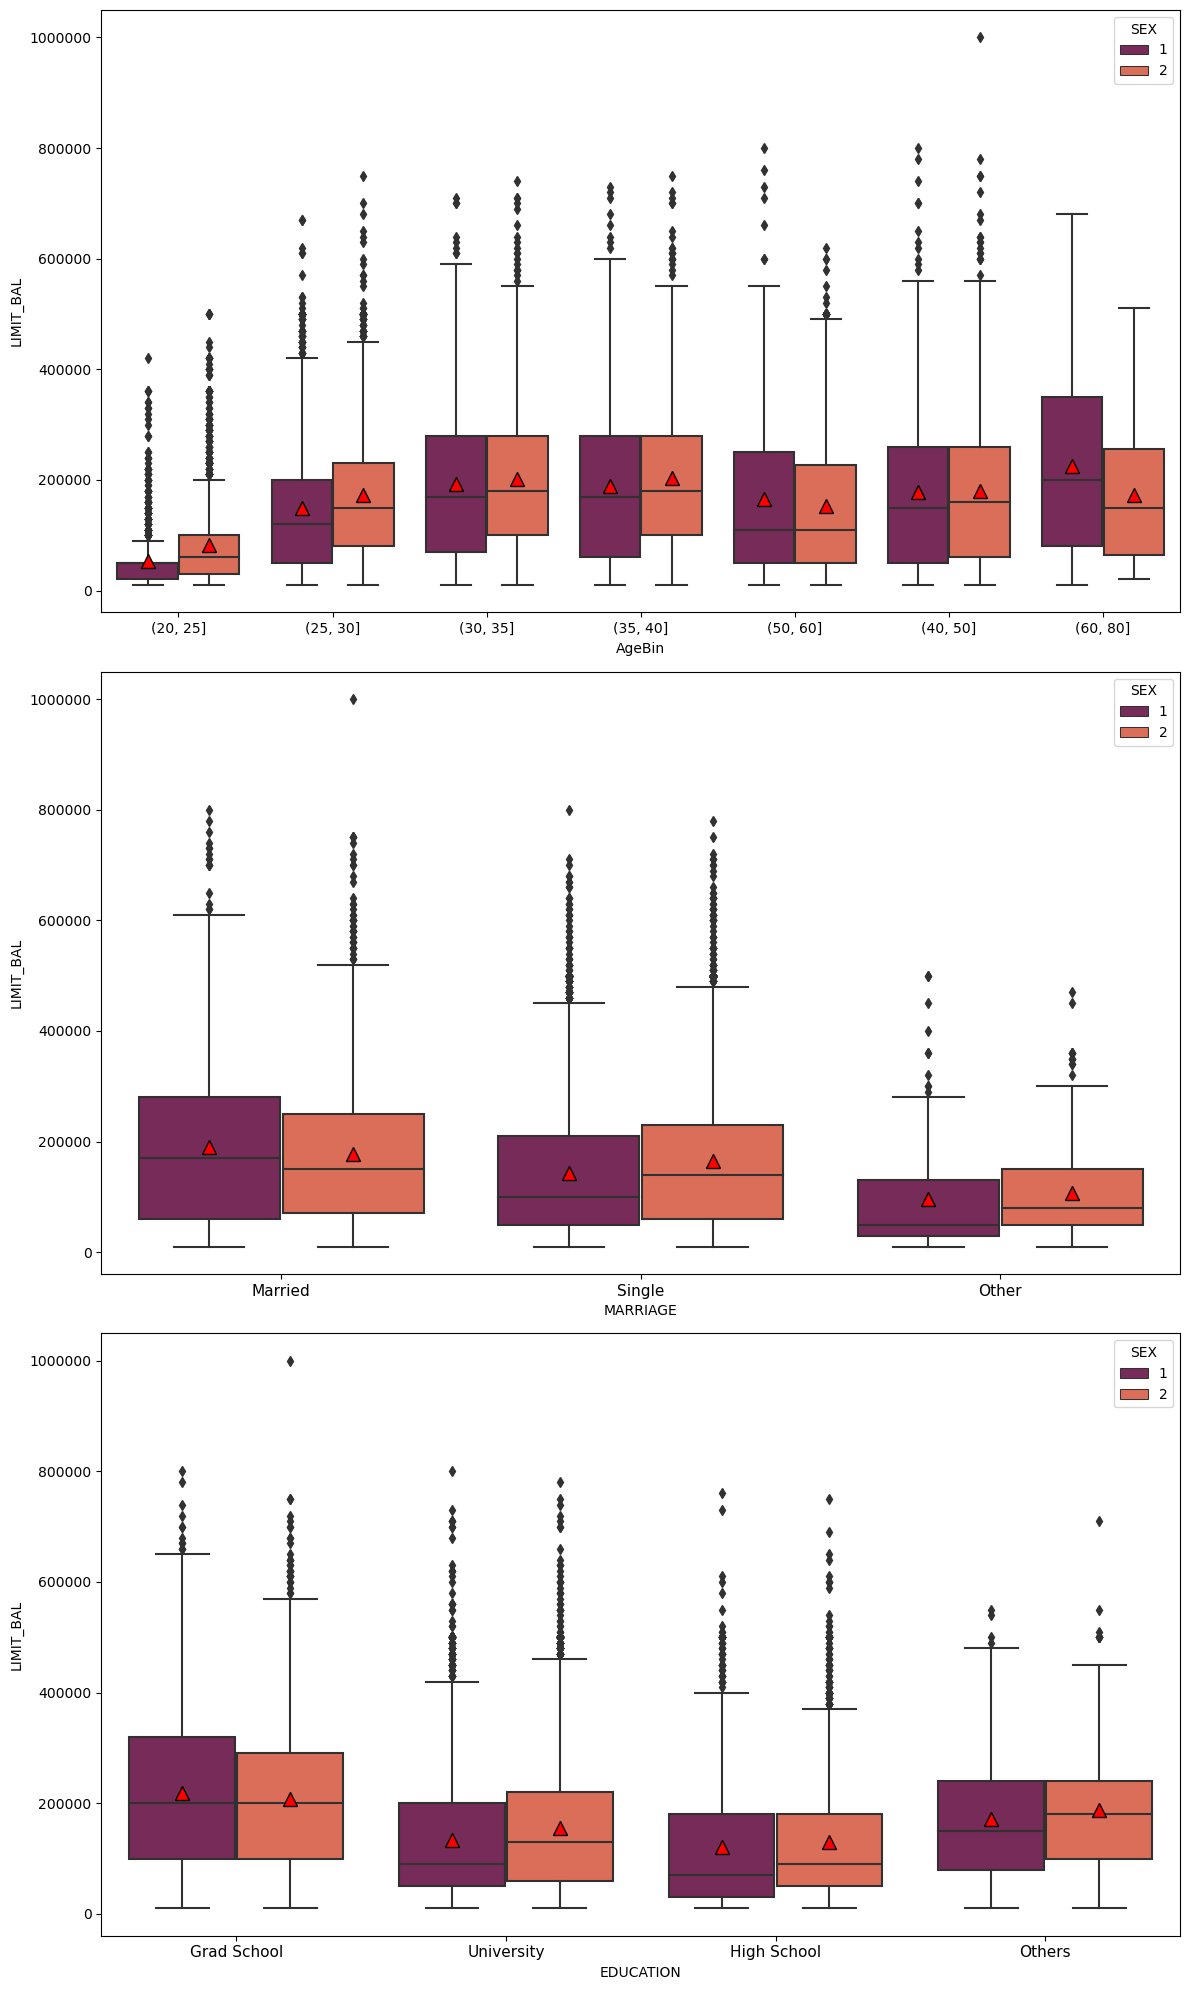

In [57]:
plt.figure(figsize=(12,20))
plt.subplot(3,1,1)
#Sub plot for AgeBin
sns.boxplot(x='AgeBin',y='LIMIT_BAL',hue='SEX',data=df,palette='rocket',showmeans=True,
            meanprops={'markerfacecolor':'red','markeredgecolor':'black', 'markersize':'10'})
plt.ticklabel_format(style='plain',axis='y')
#Sub plot for Marriage
plt.subplot(3,1,2)
sns.boxplot(x="MARRIAGE",y='LIMIT_BAL',hue="SEX",data=df,palette='rocket',showmeans='True',
           meanprops={'markerfacecolor':"red",'markeredgecolor':'black','markersize':'10'})
plt.ticklabel_format(style='plain',axis='y')
plt.xticks([0,1,2],['Married','Single','Other'],fontsize=11)
#Plot for Education
plt.subplot(3,1,3)
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',hue='SEX',data=df,palette='rocket',showmeans='True',
           meanprops={'markerfacecolor':'red','markeredgecolor':'black','markersize':'10'})
plt.ticklabel_format(style='plain',axis='y')
plt.xticks([0,1,2,3],["Grad School","University","High School",'Others'],fontsize=11)
plt.tight_layout()
plt.show()


The average given credit for women was slightly higher than for men. 
That still holds up for several combinations of categories, except among customers that:
Have a grad school diploma;
Are married;
Are 50+ years old.

<AxesSubplot:>

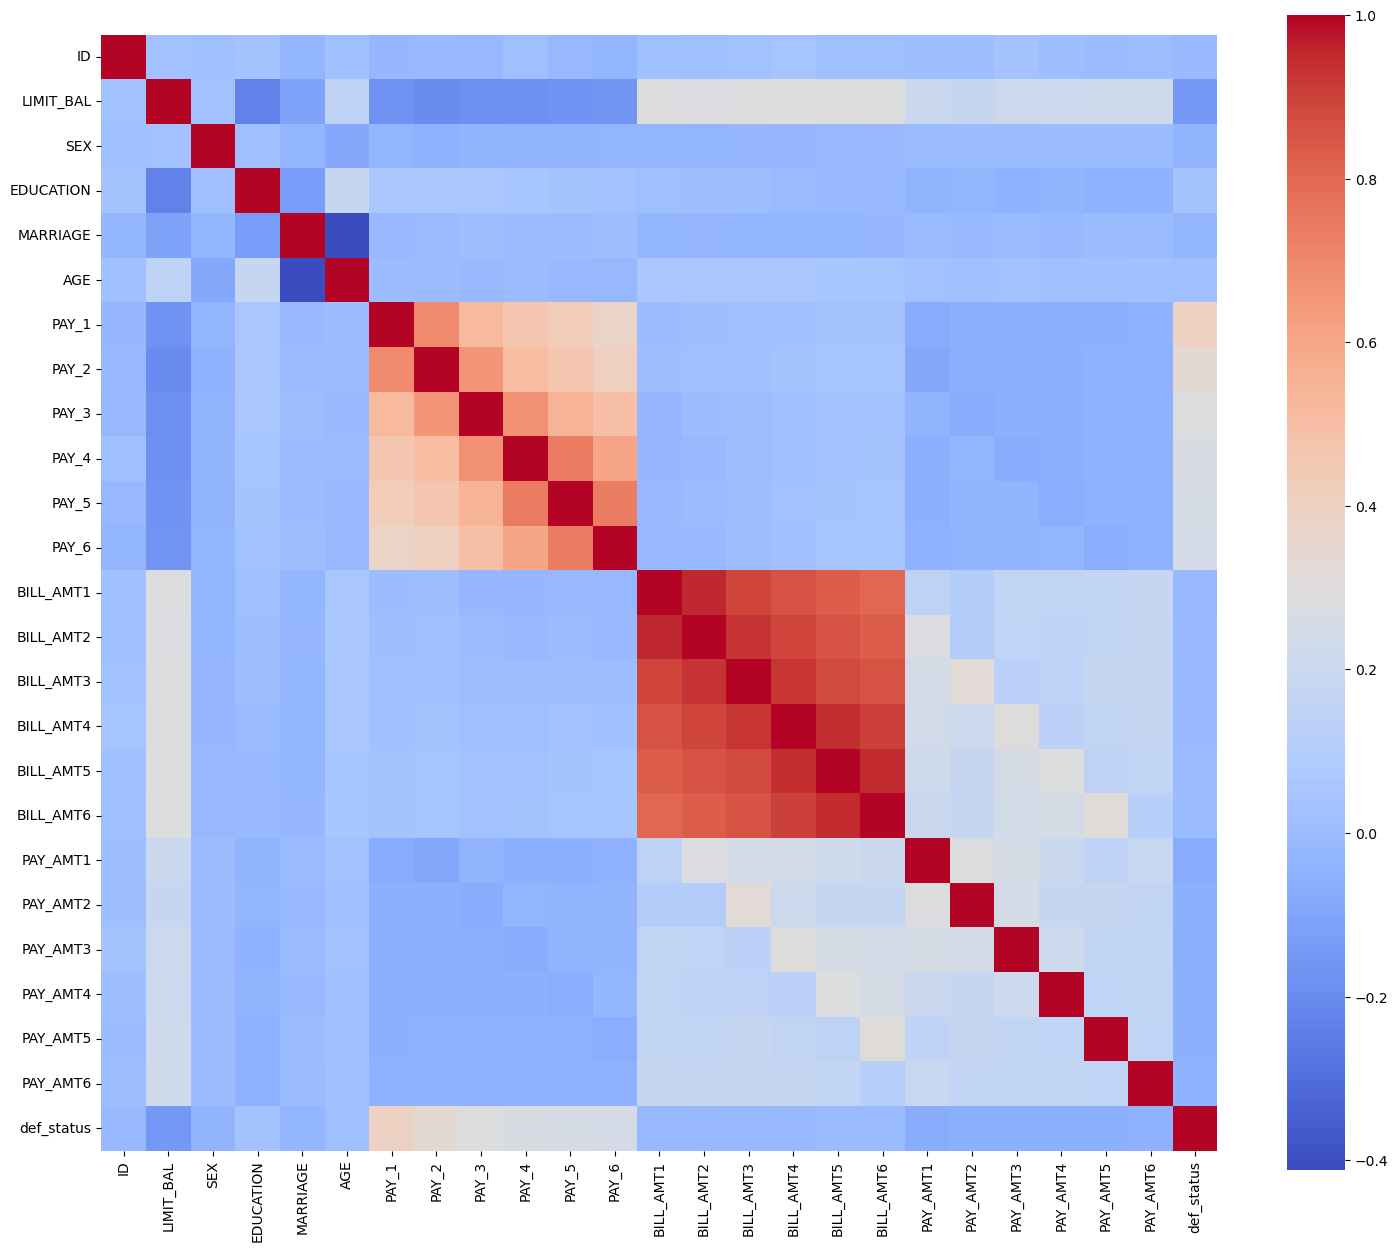

In [58]:
# Correlation
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),square=True,cmap='coolwarm')

Conclusion of Analysis
The above heatmap shows that the features like PAY_0,1,2,3,4 and Bill_amt_1,2,3,4 are coorelated to each other 


Behavior 
-The people who delay payment for over 4 months have high chance of default almost above 70%
-Individuals with Negative bill statments are less likely to default 
-Low previous paymnets around 0 have higher tendency or default which is around 30%
-Low education indicates low limit_balance which increases the chances of default 
-Individuals with marriage as 'others' have high likelood of default 
-People between 20=25 and above 50 have more chance of default 
-The likelood of default decreases as the credit limit increases. 
-The highest default probablity is when the credit limit is 50k which is 32%  

Now starting the prediction process 

In [59]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5_bin,BILL_AMT6_bin,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin,AgeBin,LIMIT_BAL_bin
0,1,20000.0,2,2,1,24,2,2,0,0,...,"(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(20, 25]","(5000, 50000]"
1,2,120000.0,2,2,2,26,0,2,0,0,...,"(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(25, 30]","(100000, 150000]"
2,3,90000.0,2,2,2,34,0,0,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(30, 35]","(50000, 100000]"
3,4,50000.0,2,2,1,37,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(35, 40]","(5000, 50000]"
4,5,50000.0,1,2,1,57,0,0,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(50, 60]","(5000, 50000]"


In [60]:
dataset = pd.read_csv("D:/Msc Data Sciences (Birbeck UOL)/DSTA/Coursework/UCI_Credit_Card.csv")

In [61]:
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [62]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [63]:
dataset = dataset.drop('ID',axis=1)

In [64]:
dataset = dataset.rename(columns={'default.payment.next.month':'default_status'})
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [65]:
X = dataset.drop('default_status',axis=1)
y = dataset['default_status']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)

In [67]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

LIMIT_BAL: 0.018695862963795662
SEX: 0.01718035899102688
EDUCATION: 0.021972404792904854
MARRIAGE: 0.021069355309009552
AGE: 0.02273104153573513
PAY_0: 0.2738855183124542
PAY_2: 0.1265334188938141
PAY_3: 0.053475599735975266
PAY_4: 0.03627340495586395
PAY_5: 0.04937480390071869
PAY_6: 0.038478586822748184
BILL_AMT1: 0.02734873630106449
BILL_AMT2: 0.024408414959907532
BILL_AMT3: 0.024510353803634644
BILL_AMT4: 0.023485885933041573
BILL_AMT5: 0.02364273928105831
BILL_AMT6: 0.024867532774806023
PAY_AMT1: 0.02827771008014679
PAY_AMT2: 0.030378073453903198
PAY_AMT3: 0.034128349274396896
PAY_AMT4: 0.025814799591898918
PAY_AMT5: 0.02834457904100418
PAY_AMT6: 0.025122448801994324


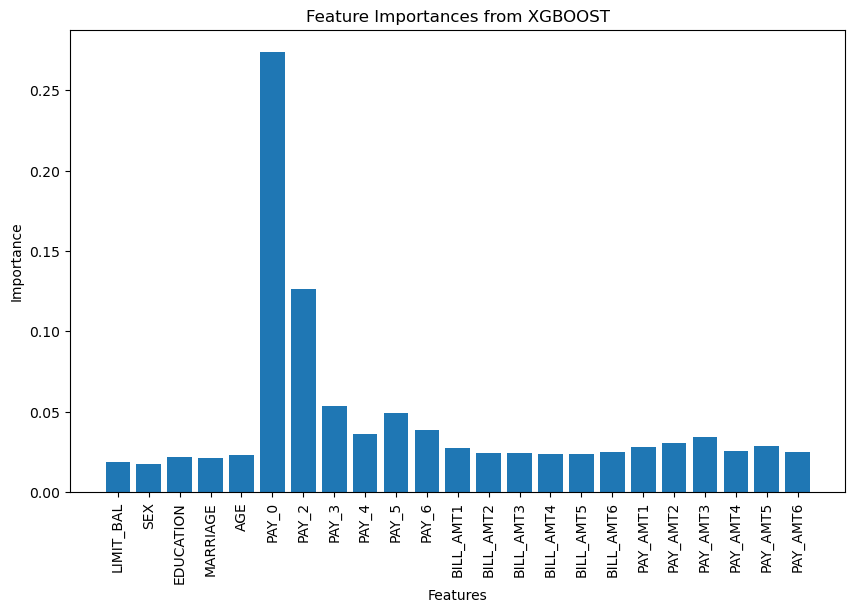

In [68]:
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from XGBOOST')
plt.xticks(rotation='vertical')
plt.show()


In [69]:
# Lets implement RFE as well 
from sklearn.feature_selection import RFE 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
logReg_model = LogisticRegression(max_iter=1000)
features_to_slct = 8
rfe = RFE(logReg_model, n_features_to_select = features_to_slct)
rfe.fit(X_train,y_train)
slctd_features = np.where(rfe.support_)[0]
X_train_slctd = X_train.iloc[:,slctd_features]
X_test_slctd = X_test.iloc[:,slctd_features]
logReg_model.fit(X_train_slctd,y_train)
accuracy = logReg_model.score(X_test_slctd,y_test)
print(f"Accuracy with {features_to_slct} selected features: {accuracy}")


Accuracy with 8 selected features: 0.8088333333333333


In [27]:
feature_ranking = rfe.ranking_
slctd_ranking_features = np.where(feature_ranking)[0]
X_train_selected_ranking = X_train.iloc[:, slctd_ranking_features]
X_test_selected_ranking = X_test.iloc[:, slctd_ranking_features]
logReg_model.fit(X_train_selected_ranking, y_train)
features_names = X.columns[slctd_ranking_features]
importance_score = logReg_model.coef_[0]
feature_importance_df = pd.DataFrame({'Feature':features_names,'Importance Score': importance_score})
print(feature_importance_df)

      Feature  Importance Score
0   LIMIT_BAL     -3.235139e-06
1         SEX     -9.413104e-04
2   EDUCATION     -1.150221e-03
3    MARRIAGE     -9.786469e-04
4         AGE     -1.631709e-02
5       PAY_0      1.222454e-03
6       PAY_2      9.583414e-04
7       PAY_3      8.396074e-04
8       PAY_4      8.038584e-04
9       PAY_5      7.424776e-04
10      PAY_6      6.983832e-04
11  BILL_AMT1     -8.011282e-06
12  BILL_AMT2      5.026908e-06
13  BILL_AMT3      2.088972e-06
14  BILL_AMT4      1.026709e-07
15  BILL_AMT5      3.158226e-06
16  BILL_AMT6      1.918147e-06
17   PAY_AMT1     -2.405315e-05
18   PAY_AMT2     -2.046798e-05
19   PAY_AMT3     -7.135349e-06
20   PAY_AMT4     -7.838669e-06
21   PAY_AMT5     -3.604219e-06
22   PAY_AMT6     -2.969259e-06


In [71]:
selected_feature_columns = ["AGE", "PAY_0" , "PAY_2", "PAY_3", "PAY_4","MARRIAGE","EDUCATION"]

# Extract the features (X) and the target variable (y) based on the selected columns
X = dataset[selected_feature_columns]
y = dataset['default_status']  # Replace 'target_column' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a model (Logistic Regression in this example)
model = LogisticRegression(max_iter=1000)  # You can use the same model you used for feature selection

# Train the model on the training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
accuracy = model.score(X_test,y_test)
print(f"Accuracy on the test data: {accuracy}")


       Actual  Predicted
2308        0          0
22404       0          0
23397       0          0
25058       0          0
2664        1          0
...       ...        ...
2210        0          0
14144       1          0
23108       0          0
25703       0          0
29171       0          0

[6000 rows x 2 columns]
Accuracy on the test data: 0.8078333333333333


In [72]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4572  115]
 [1038  275]]
